#### Note

In [ ]:
# pd.set_option('display.max_rows', 100) # 최대 display option set
# pd.reset_option('display.max_rows') # 최대 display option reset

# from datetime import timedelta
# datetime.datetime(2019,12,31) - datetime.datetime(2008,1,1)

#### IMPORT

In [2]:
# 기본
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib import font_manager, rc
import platform
from tqdm import tqdm
import sklearn
from sklearn import linear_model
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.model_selection import train_test_split

# time
import datetime

# crawling
import requests
import lxml.html
import sqlite3
from pandas.io import sql
from bs4 import BeautifulSoup

# 한글 폰트 설정
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

#### 08-19 OHCA 합치기

In [ ]:
# ohca_08 = pd.read_sas('data\\급성심장정지조사(08-19)SAS\\ohca_08.sas7bdat', encoding = 'euc-kr')
# ohca_09 = pd.read_sas('data\\급성심장정지조사(08-19)SAS\\ohca_09.sas7bdat', encoding = 'euc-kr')
# ohca_10 = pd.read_sas('data\\급성심장정지조사(08-19)SAS\\ohca_10.sas7bdat', encoding = 'euc-kr')
# ohca_11 = pd.read_sas('data\\급성심장정지조사(08-19)SAS\\ohca_11.sas7bdat', encoding = 'euc-kr')
# ohca_12 = pd.read_sas('data\\급성심장정지조사(08-19)SAS\\ohca_12.sas7bdat', encoding = 'euc-kr')
# ohca_13 = pd.read_sas('data\\급성심장정지조사(08-19)SAS\\ohca_13.sas7bdat', encoding = 'euc-kr')
# ohca_14 = pd.read_sas('data\\급성심장정지조사(08-19)SAS\\ohca_14.sas7bdat', encoding = 'euc-kr')
# ohca_16 = pd.read_sas('data\\급성심장정지조사(08-19)SAS\\ohca_16.sas7bdat', encoding = 'euc-kr')
# ohca_17 = pd.read_sas('data\\급성심장정지조사(08-19)SAS\\ohca_17.sas7bdat', encoding = 'euc-kr')
# ohca_18 = pd.read_sas('data\\급성심장정지조사(08-19)SAS\\ohca_18.sas7bdat', encoding = 'euc-kr')
# ohca_19 = pd.read_sas('data\\급성심장정지조사(08-19)SAS\\ohca_19.sas7bdat', encoding = 'euc-kr')

In [ ]:
# ohca_15 = pd.read_table('data\\급성심장정지조사(08-19)SAS\\ohca_15.txt', encoding = 'utf-8', sep='\t')

In [ ]:
# ohca_15

In [ ]:
# ohca_all = pd.concat([ohca_08, ohca_09, ohca_10, ohca_11, ohca_12, ohca_13, ohca_14, ohca_15, ohca_16, ohca_17, ohca_18, ohca_19], axis = 0)
# ohca_all.reset_index(drop = True, inplace = True)
# ohca_all

In [ ]:
# ohca_all.to_csv('data\\급성심장정지조사(08-19)SAS\\ohca_all.csv', encoding = 'euc-kr', index = False)

#### 08-19 합친 ohca_all 다시 불러오기

In [47]:
ohca_all = pd.read_csv('data\\급성심장정지조사(08-19)SAS\\ohca_all.csv', encoding = 'euc-kr', low_memory = False)
ohca_all

,YEAR,H_ADMINCODE,H_ADD_CITY,H_ADD_DIST,P_ADMINCODE,P_ADD_CITY,P_ADD_DIST,H_SEX,AGE,INS,...,OP8_PRE_VITAL_PR,OP8_PRE_VITAL_RR,OP8_PRE_VITAL_BT,OP8_PRE_VITAL_DT,OP8_PRE_VITAL_TM,OP8_SUCCESS,OP8_ROSC,OP8_ROSC_DT,OP8_ROSC_TM,BYSTANDER_AED
0,2008,11410.0,서울,서대문구,11680.0,서울,강남구,1,58,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,11320.0,서울,도봉구,11305.0,서울,강북구,2,47,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,11110.0,서울,종로구,11440.0,서울,마포구,2,81,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,11590.0,서울,동작구,11590.0,서울,동작구,2,64,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,11560.0,서울,영등포구,11560.0,서울,영등포구,1,72,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324126,2019,36110.0,세종,세종시,36110.0,세종,세종시,1,80,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
324127,2019,43112.0,충북,청주시 서원구,44230.0,충남,논산시,1,60,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
324128,2019,36110.0,세종,세종시,36110.0,세종,세종시,2,56,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
324129,2019,36110.0,세종,세종시,36110.0,세종,세종시,2,35,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### 과천, 마포 check

In [ ]:
check = pd.read_csv('data\\급성심장정지조사(08-19)SAS\\ohca_all.csv', encoding = 'euc-kr', low_memory = False)

In [ ]:
check.loc[check['P_ADD_DIST'].str.contains('마포')]

In [ ]:
check.loc[check['P_ADMINCODE'] == 11440.0]

##### 질병, 질병 외 check

In [ ]:
check['CAUSE'].value_counts()

In [ ]:
check['CAUSE_DISEASE'].value_counts()

##### 성남시 중원구 check
ADMINCODE 41133

In [ ]:
ohca_all.loc[ohca_all['P_ADD_DIST'].str.contains('중원')]

##### ADD_CITY, ADD_DIST 합치기

In [48]:
ohca_all['H_ADD_CITY_DIST'] = ohca_all['H_ADD_CITY'] + ' ' + ohca_all['H_ADD_DIST']
ohca_all['P_ADD_CITY_DIST'] = ohca_all['P_ADD_CITY'] + ' ' + ohca_all['P_ADD_DIST']

##### AGE, SEX, 기저질환군별 check

In [49]:
ohca_all['H_SEX'].value_counts()

1    208520
2    115611
Name: H_SEX, dtype: int64

In [50]:
group_age = ohca_all.groupby(ohca_all['AGE'] // 10)
group_age = pd.DataFrame(group_age.size().reset_index(name='count'))
group_age

,AGE,count
0,0,4583
1,1,4722
2,2,9777
3,3,15927
4,4,32577
5,5,51000
6,6,53825
7,7,76403
8,8,60067
9,9,14629


(0.0, 11.0)

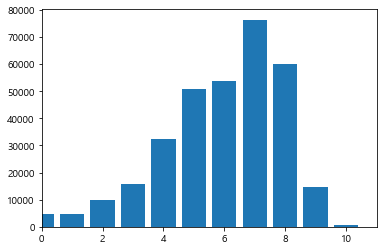

In [51]:
plt.bar(group_age['AGE'], group_age['count'])
plt.xlim([0, 11])

In [52]:
# # ohca_all.loc[ohca_all['AGE'] >= 70, 'AGE'].count()   # 151720
# # ohca_all['AGE'].between(60, 70, inclusive=True).sum()  # 60721
# ohca_all['AGE'].between(50, 60, inclusive=True).sum()  # 56318

In [53]:
# 70세로 끊자 

ohca_all.loc[ohca_all['AGE'] >= 70, 'above70'] = 1
ohca_all.loc[ohca_all['AGE'] < 70, 'above70'] = 0

In [54]:
ohca_all['above70'].value_counts()

0.0    172411
1.0    151720
Name: above70, dtype: int64

In [55]:
# 과거력 - 고혈압
# 1 - 있음, 2 - 없음, 9 - 미상

ohca_all['PHX_HTN'].value_counts()

9.0    166620
1.0     77964
2.0     59456
Name: PHX_HTN, dtype: int64

In [56]:
# 과거력 - 당뇨병
# 1 - 있음, 2 - 없음, 9 - 미상

ohca_all['PHX_DM'].value_counts()

9.0    183672
2.0     69721
1.0     50647
Name: PHX_DM, dtype: int64

In [57]:
# 과거력 - 심장질환
# 1 - 있음, 2 - 없음, 9 - 미상

ohca_all['PHX_HEART'].value_counts()

9.0    211672
2.0     57900
1.0     34468
Name: PHX_HEART, dtype: int64

In [61]:
# 2008년 제외하고 medical_history 생성
# 미상이 너무 많다 .. 이렇게 하면 미상까지 다 0으로 처리되는 건데? 이렇게 하면 안 됨
ohca_all.loc[ohca_all['YEAR'] != 2008, 'medical_history'] = 0
ohca_all.loc[(ohca_all['PHX_HTN'] == 1) | (ohca_all['PHX_DM'] == 1) | (ohca_all['PHX_HEART'] == 1), 'medical_history'] = 1
ohca_all['medical_history'].value_counts()

0.0    192166
1.0    111874
Name: medical_history, dtype: int64

In [62]:
ohca_all

,YEAR,H_ADMINCODE,H_ADD_CITY,H_ADD_DIST,P_ADMINCODE,P_ADD_CITY,P_ADD_DIST,H_SEX,AGE,INS,...,OP8_PRE_VITAL_TM,OP8_SUCCESS,OP8_ROSC,OP8_ROSC_DT,OP8_ROSC_TM,BYSTANDER_AED,H_ADD_CITY_DIST,P_ADD_CITY_DIST,above70,medical_history
0,2008,11410.0,서울,서대문구,11680.0,서울,강남구,1,58,1,...,NaN,NaN,NaN,NaN,NaN,NaN,서울 서대문구,서울 강남구,0.0,NaN
1,2008,11320.0,서울,도봉구,11305.0,서울,강북구,2,47,1,...,NaN,NaN,NaN,NaN,NaN,NaN,서울 도봉구,서울 강북구,0.0,NaN
2,2008,11110.0,서울,종로구,11440.0,서울,마포구,2,81,5,...,NaN,NaN,NaN,NaN,NaN,NaN,서울 종로구,서울 마포구,1.0,NaN
3,2008,11590.0,서울,동작구,11590.0,서울,동작구,2,64,9,...,NaN,NaN,NaN,NaN,NaN,NaN,서울 동작구,서울 동작구,0.0,NaN
4,2008,11560.0,서울,영등포구,11560.0,서울,영등포구,1,72,1,...,NaN,NaN,NaN,NaN,NaN,NaN,서울 영등포구,서울 영등포구,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324126,2019,36110.0,세종,세종시,36110.0,세종,세종시,1,80,1,...,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,세종 세종시,1.0,0.0
324127,2019,43112.0,충북,청주시 서원구,44230.0,충남,논산시,1,60,3,...,NaN,NaN,NaN,NaN,NaN,NaN,충북 청주시 서원구,충남 논산시,0.0,0.0
324128,2019,36110.0,세종,세종시,36110.0,세종,세종시,2,56,9,...,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,세종 세종시,0.0,0.0
324129,2019,36110.0,세종,세종시,36110.0,세종,세종시,2,35,9,...,NaN,NaN,NaN,NaN,NaN,NaN,세종 세종시,세종 세종시,0.0,0.0


##### NA check

In [ ]:
# NA check 

ohca_all.isna().sum()

In [ ]:
ohca_all['P_ADMINCODE'].isna().sum()

In [ ]:
ohca_all['PRE_ER_ARREST_DT'].isna().sum()

##### 일자 칼럼들 특이값 처리 (NaN으로 대체)         
- PRE_ER_ARREST_DT
- LAST_NORM_DT
- ER_ADM_DT        

미리 대체해놓지 않으면 PRE_ER_ARREST_DT 결측을 뒤의 두 칼럼으로 채울 때 특이값이 들어가 버림

In [ ]:
# 일자 칼럼들 NaN은 빼고 str 형식으로 바꾸기
# astype(str) 쓸 때 column에 np.nan이 있으면 그것까지 str 'nan'으로 변환됨. 

ohca_all['PRE_ER_ARREST_DT'] = ohca_all['PRE_ER_ARREST_DT'].astype(str).replace('nan',np.nan)
ohca_all['LAST_NORM_DT'] = ohca_all['LAST_NORM_DT'].astype(str).replace('nan',np.nan)
ohca_all['ER_ADM_DT'] = ohca_all['ER_ADM_DT'].astype(str).replace('nan',np.nan)

In [ ]:
# NaN이 있으면, str 형식으로 바꾸고 난 이후에도 NaN 잘 살아있는 거 확인해야 함

print('PRE_ER_ARREST_DT NaNs: ', ohca_all['PRE_ER_ARREST_DT'].isna().sum())  
print('LAST_NORM_DT NaNs: ', ohca_all['LAST_NORM_DT'].isna().sum())
print('ER_ADM_DT NaNs: ', ohca_all['ER_ADM_DT'].isna().sum())

In [ ]:
# 'PRE_ER_ARREST_DT' 20080101.0 형식에서 .0 자르기
# 'LAST_NORM_DT' 20080101.0 형식에서 .0 자르기
# 'ER_ADM_DT' 20080101.0 형식에서 .0 자르기

ohca_all['PRE_ER_ARREST_DT']= ohca_all['PRE_ER_ARREST_DT'].str[0:8]
ohca_all['LAST_NORM_DT']= ohca_all['LAST_NORM_DT'].str[0:8]
ohca_all['ER_ADM_DT']= ohca_all['ER_ADM_DT'].str[0:8]

99999999 처리

In [ ]:
# PRE_ER_ARREST_DT == 99999999 or 88888888 이면 대신 nan 넣어주기
# 220

ohca_all.loc[ohca_all.PRE_ER_ARREST_DT.isin(['99999999', '88888888']), 'PRE_ER_ARREST_DT'] = np.nan

In [ ]:
ohca_all['PRE_ER_ARREST_DT'].isna().sum()   # 220 늘었음

In [ ]:
# LAST_NORM_DT == 99999999 or 88888888 이면 대신 nan 넣어주기
# 959

ohca_all.loc[ohca_all.LAST_NORM_DT.isin(['99999999', '88888888']), 'LAST_NORM_DT'] = np.nan

In [ ]:
ohca_all['LAST_NORM_DT'].isna().sum()   # 959 늘었음

In [ ]:
# ER_ADM_DT == 99999999 면 대신 nan 넣어주기
# 0

ohca_all.loc[ohca_all.ER_ADM_DT.isin(['99999999', '88888888']), 'ER_ADM_DT'] = np.nan

In [ ]:
ohca_all['ER_ADM_DT'].isna().sum()   # 0 늘었음

endswith 99 처리

In [ ]:
# PRE_ER_ARREST_DT ends with 99 면 대신 nan 넣어주기
# 155

ohca_all.loc[ohca_all['PRE_ER_ARREST_DT'].str[6:8] == '99', 'PRE_ER_ARREST_DT'] = np.nan

In [ ]:
ohca_all['PRE_ER_ARREST_DT'].isna().sum()   # 155 늘었음

In [ ]:
# LAST_NORM_DT ends with 99 면 대신 nan 넣어주기
# 1835

ohca_all.loc[ohca_all['LAST_NORM_DT'].str[6:8] == '99', 'LAST_NORM_DT'] = np.nan

In [ ]:
ohca_all['LAST_NORM_DT'].isna().sum()   # 1835 늘었음

In [ ]:
# ER_ADM_DT ends with 99 면 대신 nan 넣어주기
# 0

ohca_all.loc[ohca_all['ER_ADM_DT'].str[6:8] == '99', 'ER_ADM_DT'] = np.nan

In [ ]:
ohca_all['ER_ADM_DT'].isna().sum()   # 0 늘었음

In [ ]:
ohca_all['PRE_ER_ARREST_DT'].unique()

##### PRE_ER_ARREST_DT NA 처리

일차로 PRE_ER_ARREST_DT NaN 다 LAST_NORM_DT로 채우고, 그래도 남은 NaN ER_ADM_DT 로 채우기

In [ ]:
# PRE_ER_ARREST_DT 결측 (187497) -> LAST_NORM_DT 로 채우기

ohca_all['PRE_ER_ARREST_DT'].fillna(ohca_all['LAST_NORM_DT'], inplace = True)

In [ ]:
# 기존 18만 결측 -> 50582 결측으로 줄음

ohca_all['PRE_ER_ARREST_DT'].isna().sum()

In [ ]:
# 그래도 결측 있음 -> 50582 결측 ER_ADM_DT 로 채우기

ohca_all['PRE_ER_ARREST_DT'].fillna(ohca_all['ER_ADM_DT'], inplace = True)

In [ ]:
ohca_all['PRE_ER_ARREST_DT'].isna().sum()

In [ ]:
ohca_all['PRE_ER_ARREST_DT'].dtype

In [ ]:
# str -> object로 바꿔주기

ohca_all['PRE_ER_ARREST_DT'] = ohca_all['PRE_ER_ARREST_DT'].astype(object)

In [ ]:
# 다시 nan check - 이제 결측 없음!

ohca_all['PRE_ER_ARREST_DT'].isna().sum()

PRE_ER_ARREST_DT 결측 처리 완. 

In [ ]:
# P_ADMINCODE NA row check (8,639개) 

ohca_all.loc[ohca_all['P_ADMINCODE'].isna() == True]

In [ ]:
# H_는 있는데 P_는 없는 경우가 많음. ADMINCODE 및 일자의 NaN 처리를 위해 hospital, patient 테이블을 아예 분리해놓고 시작하자. 

##### ohca_hospital, ohca_patient 생성

In [ ]:
ohca_hospital = ohca_all.drop(['P_ADMINCODE', 'P_ADD_CITY', 'P_ADD_DIST', 'P_ADD_CITY_DIST'], axis = 1)
ohca_patient = ohca_all.drop(['H_ADMINCODE', 'H_ADD_CITY', 'H_ADD_DIST', 'H_ADD_CITY_DIST'], axis = 1)

In [ ]:
ohca_hospital

In [ ]:
ohca_patient

#### 결측 처리 및 전처리                 

0. 특이사항 수기 수정          
    - ohca_hospital['H_ADD_CITY_DIST'] == '부산 진구' 에 대한 H_ADMINCODE missing, 찾아서 넣어줌 (행정표준코드관리시스템)
    - '부산 진구' -> '부산 부산진구' 로 명칭 변경 (이게 정식 명칭이고, ohca_patient 에는 '부산 부산진구' 로 되어있음, 이래서 결측이 생겼던 것!)
    - ohca_patient['P_ADD_CITY_DIST'] == '충남 굼산군' --> '충남 금산군' 으로 수정     
    - '충남 금산군' 코드 찾아서 'P_ADMINCODE' 에 넣어줌 (행정표준코드관리시스템)               
                                                         
                                                   
                                                         
1. H_ADMINCODE, P_ADMINCODE 결측 drop    
                                                                 
                                                                                                                                       
2. PRE_ER_ARREST_DT 결측 drop                                                          

                                                                                                    
3. H_ADD_CITY_DIST, P_ADD_CITY_DIST endswith '미상' drop    


4. 'PRE_ER_ARREST_DT' 처리       
    - 99999999.0, 88888888.0        
    - 20081299.0           

##### 0. 특이사항 수기 수정  

In [ ]:
# ohca_hospital['H_ADD_CITY_DIST'] == '부산 진구' 에 대한 H_ADMINCODE missing, 찾아서 넣어줌 (행정표준코드관리시스템)
# '부산 진구' -> '부산 부산진구' 로 명칭 변경 (이게 정식 명칭이고, ohca_patient 에는 '부산 부산진구' 로 되어있음, 이래서 결측이 생겼던 것!) 

ohca_hospital.loc[ohca_hospital['H_ADD_CITY_DIST'] == '부산 진구', 'H_ADMINCODE'] = 26230.0
ohca_hospital.loc[ohca_hospital['H_ADD_CITY_DIST'] == '부산 진구', 'H_ADD_CITY_DIST'] = '부산 부산진구'
ohca_hospital

In [ ]:
# 혹시 모르니까 ohca_patient 에도 넣어줌

ohca_patient.loc[ohca_patient['P_ADD_CITY_DIST'] == '부산 진구', 'P_ADMINCODE'] = 26230.0
ohca_patient.loc[ohca_patient['P_ADD_CITY_DIST'] == '부산 진구', 'P_ADD_CITY_DIST'] = '부산 부산진구'
ohca_patient

In [ ]:
# '충남 굼산군' check

ohca_patient.loc[ohca_patient['P_ADD_CITY_DIST'] == '충남 굼산군']

In [ ]:
# ohca_hospital에는 없음

ohca_hospital.loc[ohca_hospital['H_ADD_CITY_DIST'] == '충남 굼산군']

In [ ]:
# ohca_patient['P_ADD_CITY_DIST'] == '충남 굼산군' --> '충남 금산군' 으로 수정
# '충남 금산군' 코드 찾아서 'P_ADMINCODE' 에 넣어줌 (행정표준코드관리시스템)  

ohca_patient.loc[ohca_patient['P_ADD_CITY_DIST'] == '충남 굼산군', 'P_ADD_CITY_DIST'] = '충남 금산군'
ohca_patient.loc[ohca_patient['P_ADD_CITY_DIST'] == '충남 금산군', 'P_ADMINCODE'] = 44710.0
ohca_patient

##### 1. H_ADMINCODE, P_ADMINCODE 결측 drop

In [ ]:
# 결측 개수 확인 (H_ADMINCODE) - 없음

ohca_hospital.loc[ohca_hospital['H_ADMINCODE'].isna() == True]

In [ ]:
# 결측 개수 확인 (P_ADMINCODE) - 8,638개, 시군구코드 뿐만 아니라 도시,지역 다 '미상' 처리라 그냥 drop 해야 함. 

ohca_patient.loc[ohca_patient['P_ADMINCODE'].isna() == True]

In [ ]:
# drop & save

ohca_hospital.dropna(subset=['H_ADMINCODE'], inplace = True)
ohca_patient.dropna(subset=['P_ADMINCODE'], inplace = True)

In [ ]:
ohca_hospital # 324131 cases left

In [ ]:
ohca_patient # 315493 cases left

##### 2. PRE_ER_ARREST_DT 결측 drop

In [ ]:
# 기존에 했었으나, 위의 '불러오기' 단계에서 PRE_ER_ARREST_DT 결측 다 채웠기 때문에 실행 안해도 됨! (실행해도 무방하긴 함)

ohca_hospital.dropna(subset=['PRE_ER_ARREST_DT'], inplace = True)
ohca_patient.dropna(subset=['PRE_ER_ARREST_DT'], inplace = True)

##### 3. H_ADD_CITY_DIST, P_ADD_CITY_DIST endswith '미상' drop

In [ ]:
# ohca_hospital에는 없음

ohca_hospital.loc[ohca_hospital['H_ADD_CITY_DIST'].str.endswith('미상') == True]

In [ ]:
# ohca_patient 확인 -> 있음 (18개)

ohca_patient.loc[ohca_patient['P_ADD_CITY_DIST'].str.endswith('미상') == True]

In [ ]:
# ohca_patient endswith '미상' drop - 315475 cases left

ohca_patient = ohca_patient.loc[ohca_patient['P_ADD_CITY_DIST'].str.endswith('미상') == False].copy()
ohca_patient

##### reset index

In [ ]:
ohca_patient.reset_index(drop = True, inplace = True)
ohca_hospital.reset_index(drop = True, inplace = True)

In [ ]:
# 결측 다시 확인

ohca_hospital.isna().sum()

In [ ]:
# 결측 다시 확인

ohca_patient.isna().sum()

##### 추가 처리 - \ 로 끝나는 일자가 있음

In [ ]:
tmp = pd.DataFrame(ohca_patient['PRE_ER_ARREST_DT'].astype(str))    # check
tmp.loc[tmp['PRE_ER_ARREST_DT'].str.endswith('\\')]

In [ ]:
tmp = pd.DataFrame(ohca_hospital['PRE_ER_ARREST_DT'].astype(str))    # check
i = tmp.loc[tmp['PRE_ER_ARREST_DT'].str.endswith('\\')].index
i

In [ ]:
# ohca_hospital - '\' 로 끝나는 데이터 (1개) 삭제 (이거 때문에 datetime 변경이 안됨)

ohca_hospital['PRE_ER_ARREST_DT'] = ohca_hospital['PRE_ER_ARREST_DT'].astype(str)
i = ohca_hospital.loc[ohca_hospital['PRE_ER_ARREST_DT'].str.endswith('\\')].index
ohca_hospital.drop(i, inplace = True)
ohca_hospital.reset_index(drop = True, inplace = True)
ohca_hospital

In [ ]:
# ohca_patient - '\' 로 끝나는 데이터 (1개) 삭제 (이거 때문에 datetime 변경이 안됨)

ohca_patient['PRE_ER_ARREST_DT'] = ohca_patient['PRE_ER_ARREST_DT'].astype(str)
i = ohca_patient.loc[ohca_patient['PRE_ER_ARREST_DT'].str.endswith('\\')].index
ohca_patient.drop(i, inplace = True)
ohca_patient.reset_index(drop = True, inplace = True)
ohca_patient

In [ ]:
ohca_patient.loc[ohca_patient['P_ADMINCODE'] == 41133]    # 중원 check - 여기까지 잘 살아있음

##### 결측 처리 및 전처리 완.

---------------------------------------------------

#### 일자별 x 시군구 cross join index 생성

##### 임의의 환자 고유 아이디 생성 및 연간 발생 case count

In [ ]:
# 임의의 환자 고유 아이디 생성 (NUM)

ohca_hospital['NUM'] = np.arange(len(ohca_hospital))
ohca_hospital

In [ ]:
# 병원 소재지 기준 연간 30000명 가량 (원시자료 설명 기준) -> 27010 cases로 줄음

324130 / 12

In [ ]:
# 임의의 환자 고유 아이디 생성 (NUM)

ohca_patient['NUM'] = np.arange(len(ohca_patient))
ohca_patient

In [ ]:
# 환자 소재지 기준 연간 30000명 가량 (원시자료 설명 기준) -> 26289명으로 줄음 

315474 / 12

##### 2007.11 ~ 2020-01-01까지의 모든 일자 dataframe으로 만들기

In [ ]:
# 2007.11 ~ 2020-01-01까지의 모든 일자 dataframe으로 만들기

rng = pd.date_range(start = '2007-11-01', end = '2020-01-01', freq='D')
days = pd.DataFrame({'PRE_ER_ARREST_DT': rng}) 
days

##### hospital_cityname_index, patient_cityname_index 만들기

In [ ]:
# 전처리 완료된 ohca_hospital에서 admincode, H_ADD_CITY_DIST 만 뽑아와서 unique, drop dup
# 총 254개 index

hospital_cityname_index = ohca_hospital[['H_ADMINCODE', 'H_ADD_CITY_DIST']].copy()
hospital_cityname_index.drop_duplicates(subset=['H_ADMINCODE', 'H_ADD_CITY_DIST'], inplace = True)
hospital_cityname_index.reset_index(drop = True, inplace = True)
hospital_cityname_index

In [ ]:
print('cityname: ', len(hospital_cityname_index['H_ADD_CITY_DIST'].unique()), 'unique values')
print('citycode: ', len(hospital_cityname_index['H_ADMINCODE'].unique()), 'unique values')   

# 갯수 안 맞음. 
# (코드, 시군구 이름) 기준으로 drop dup 했는데 안 맞는다는 건 코드는 같은데 이름이 다른 경우가 있다는 뜻, 내보내서 확인 한번 하자
# 부산 부산진구 != 부산 진구 이거였음

# ---> 맞췄음!

In [ ]:
# hospital_cityname_index.to_csv('data\\dump\\hospital_cityname_index.csv', encoding = 'euc-kr', index = False)

In [ ]:
# 전처리 완료된 ohca_patient에서 admincode, P_ADD_CITY_DIST 만 뽑아와서 unique, drop dup
# 총 263개 index

patient_cityname_index = ohca_patient[['P_ADMINCODE', 'P_ADD_CITY_DIST']].copy()
patient_cityname_index.drop_duplicates(subset=['P_ADMINCODE', 'P_ADD_CITY_DIST'], inplace = True)
patient_cityname_index.reset_index(drop = True, inplace = True)
patient_cityname_index

In [ ]:
patient_cityname_index.loc[patient_cityname_index['P_ADMINCODE'] == 26230]

In [ ]:
patient_cityname_index.loc[patient_cityname_index['P_ADMINCODE'] == 41133]    # 중원 check - 여기까지 잘 살아있음

In [ ]:
# 갯수 일치 확인

print('cityname: ', len(patient_cityname_index['P_ADD_CITY_DIST'].unique()), 'unique values')
print('citycode: ', len(patient_cityname_index['P_ADMINCODE'].unique()), 'unique values')   

In [ ]:
# patient_cityname_index P_ADMINCODE 결측 (당연히) 없음

patient_cityname_index.isna().sum()

In [ ]:
# hospital_cityname_index H_ADMINCODE 결측 (당연히) 없음

hospital_cityname_index.isna().sum()

In [ ]:
hospital_cityname_index.dtypes  # dtype check

In [ ]:
# # 내보내서 뭐 있는지 한번 확인

# hospital_cityname_index.to_csv('data\\급성심장정지조사(08-19)SAS\\hospital_cityname_index.csv', encoding = 'euc-kr', index = False)
# patient_cityname_index.to_csv('data\\급성심장정지조사(08-19)SAS\\patient_cityname_index.csv', encoding = 'euc-kr', index = False)

##### 2008-2020.01.01 days x cityname_index cross join 해서 일자별, 시군구 index 생성하기

In [ ]:
# cross join days x hospital code

hospital_index = days.merge(hospital_cityname_index, how='cross')
hospital_index

In [ ]:
# hospital_index 일수, admincode 수 확인 - 맞음

print(len(hospital_index['PRE_ER_ARREST_DT'].unique()))
print(len(hospital_index['H_ADMINCODE'].unique()))
print(len(hospital_index['H_ADD_CITY_DIST'].unique()))

In [ ]:
# 개수 맞음!

len(hospital_index['PRE_ER_ARREST_DT'].unique()) * len(hospital_index['H_ADMINCODE'].unique())

In [ ]:
# cross join days x patient code

patient_index = days.merge(patient_cityname_index, how='cross')
patient_index

In [ ]:
# patient_index 일수, admincode 수 확인 - 맞음

print(len(patient_index['PRE_ER_ARREST_DT'].unique()))
print(len(patient_index['P_ADMINCODE'].unique()))
print(len(patient_index['P_ADD_CITY_DIST'].unique()))

In [ ]:
# 개수 맞음 ! 

len(patient_index['PRE_ER_ARREST_DT'].unique()) * len(patient_index['P_ADMINCODE'].unique())

In [ ]:
patient_index.loc[patient_index['P_ADMINCODE'] == 41133]       # 중원 check - 여기까지 잘 살아있음

##### 01.12 - 질병으로 인한 급성심정지인 사람만 뽑기

In [ ]:
ohca_patient.loc[ohca_patient['CAUSE'] == 1]

In [ ]:
ohca_patient_disease = ohca_patient.loc[ohca_patient['CAUSE'] == 1].copy()
ohca_patient_disease.reset_index(drop = True, inplace = True)
ohca_patient_disease

##### 병원 소재지별, 급성심장정지 목격일자별 aggregate

In [ ]:
# 병원 소재지별, 급성심장정지 목격일자별 aggregate

group_hospital = ohca_hospital.groupby(['PRE_ER_ARREST_DT', 'H_ADMINCODE', 'H_ADD_CITY_DIST'])
group_hospital = pd.DataFrame(group_hospital.size().reset_index(name='count'))

In [ ]:
# check 

group_hospital

In [ ]:
# 일자 unique 값 한번 전부 뽑아보기 - 다 정상인 듯 !

lst = group_hospital['PRE_ER_ARREST_DT'].unique().tolist()
for value in range(len(lst)): 
    print(lst[value])

In [ ]:
# 환자 거주지별, 급성심장정지 목격일자별 aggregate

group_patient = ohca_patient.groupby(['PRE_ER_ARREST_DT', 'P_ADMINCODE', 'P_ADD_CITY_DIST'])
group_patient = pd.DataFrame(group_patient.size().reset_index(name='count'))

In [ ]:
# 환자 거주지별, 급성심장정지 목격일자별 aggregate (질병 원인인 사람만)

group_patient_disease = ohca_patient_disease.groupby(['PRE_ER_ARREST_DT', 'P_ADMINCODE', 'P_ADD_CITY_DIST'])
group_patient_disease = pd.DataFrame(group_patient_disease.size().reset_index(name='count_disease'))

In [ ]:
# check - 260814

group_patient

In [ ]:
group_patient.loc[group_patient['P_ADMINCODE'] == 41133]    # 중원 check - ok

In [ ]:
# check - 200132

group_patient_disease

In [ ]:
group_patient_disease.loc[group_patient_disease['P_ADMINCODE'] == 41133]    # 중원 check - ok

##### PRE_ER_ARREST_DT 처리 및 정렬 (datetime 변경)

In [ ]:
group_hospital['PRE_ER_ARREST_DT'].dtype

In [ ]:
# group_hospital - datetime 으로 

group_hospital['PRE_ER_ARREST_DT'] = pd.to_datetime(group_hospital['PRE_ER_ARREST_DT'])
group_hospital

In [ ]:
# group_patient - datetime 으로

group_patient['PRE_ER_ARREST_DT'] = pd.to_datetime(group_patient['PRE_ER_ARREST_DT'])
group_patient

In [ ]:
# group_patient_disease - datetime 으로

group_patient_disease['PRE_ER_ARREST_DT'] = pd.to_datetime(group_patient_disease['PRE_ER_ARREST_DT'])
group_patient_disease

In [ ]:
# date로 sort

group_hospital.sort_values('PRE_ER_ARREST_DT', inplace = True)
group_hospital.reset_index(drop = True, inplace = True)

In [ ]:
# check

group_hospital

In [ ]:
# date로 sort

group_patient.sort_values('PRE_ER_ARREST_DT', inplace = True)
group_patient.reset_index(drop = True, inplace = True)

In [ ]:
# check

group_patient

In [ ]:
# date로 sort

group_patient_disease.sort_values('PRE_ER_ARREST_DT', inplace = True)
group_patient_disease.reset_index(drop = True, inplace = True)

In [ ]:
# check

group_patient_disease

##### hospital_index, patient_index LEFT JOIN aggregated data

In [ ]:
hospital_index

In [ ]:
# hospital_index랑 left join 하기

group_hospital = pd.merge(hospital_index, group_hospital, on=['PRE_ER_ARREST_DT', 'H_ADMINCODE'], how = 'left')
group_hospital

In [ ]:
4445 * 254  # 개수 맞음!

In [ ]:
# patient_index랑 left join 하기

group_patient = pd.merge(patient_index, group_patient, on=['PRE_ER_ARREST_DT', 'P_ADMINCODE'], how = 'left')
group_patient

In [ ]:
4445 * 263   # 개수 맞음!

In [ ]:
# patient_index랑 left join 하기

group_patient_disease = pd.merge(patient_index, group_patient_disease, on=['PRE_ER_ARREST_DT', 'P_ADMINCODE'], how = 'left')
group_patient_disease

In [ ]:
4445 * 263   # 개수 맞음!

##### Left Join 후 count == NaN 인 case들 0으로 채우기
인덱스에는 전체 일자*시군구가 다 존재하나, aggregated 된 데이터에는 없어서 missing 이 들어간 것      
해당 일자, 해당 시군구에는 발생자가 없는 것이니 0이 들어가야 함
- 단, 2007.11 ~ 2007.12 데이터는 0 채우면 안되고 NaN이 들어가야 함. (해당기간의 급성심정지 데이터 없음)

! 여기서부터 group_patient, group_patient_disease (22.01.12 추가)만 진행함 ! 

In [ ]:
group_patient['PRE_ER_ARREST_DT'] = group_patient['PRE_ER_ARREST_DT'].astype(str)
group_patient_disease['PRE_ER_ARREST_DT'] = group_patient_disease['PRE_ER_ARREST_DT'].astype(str)

In [ ]:
# 2007.11 ~ 12 데이터는 0 채우면 안되고 NaN이 들어가야 함
# 2007만 제외하고 0 채우기

# group_hospital['count'].fillna(0, inplace = True) - hospital 뺌
# group_patient['count'].fillna(0, inplace = True) - 하단으로 코드 변경

group_patient.loc[(group_patient['PRE_ER_ARREST_DT'].str[0:4] != '2007') & (group_patient['count'].isna() == True), 'count'] = 0
group_patient_disease.loc[(group_patient_disease['PRE_ER_ARREST_DT'].str[0:4] != '2007') & (group_patient_disease['count_disease'].isna() == True), 'count_disease'] = 0

In [ ]:
group_patient.loc[(group_patient['PRE_ER_ARREST_DT'].str[0:4] != '2007')]

In [ ]:
group_patient_disease.loc[(group_patient_disease['PRE_ER_ARREST_DT'].str[0:4] != '2007')]

In [ ]:
# # 'count' column 에 대해 value_count 한번 해보자 - group_hospital

# group_hospital['count'].value_counts()

In [ ]:
# 'count' column 에 대해 value_count 한번 해보자 - group_patient

group_patient['count'].value_counts()

In [ ]:
# 'count_disease' column 에 대해 value_count 한번 해보자 - group_patient_disease

group_patient_disease['count_disease'].value_counts()

##### drop _y column, rename _x column
_x column이 index 기준 시군구 명칭임

In [ ]:
# drop
# group_hospital.drop(['H_ADD_CITY_DIST_y'], axis = 1, inplace = True)
group_patient.drop(['P_ADD_CITY_DIST_y'], axis = 1, inplace = True)
group_patient_disease.drop(['P_ADD_CITY_DIST_y'], axis = 1, inplace = True)

In [ ]:
# rename
# group_hospital.rename(columns = {'H_ADD_CITY_DIST_x': 'H_ADD_CITY_DIST'}, inplace = True)
group_patient.rename(columns = {'P_ADD_CITY_DIST_x': 'P_ADD_CITY_DIST'}, inplace = True)
group_patient_disease.rename(columns = {'P_ADD_CITY_DIST_x': 'P_ADD_CITY_DIST'}, inplace = True)

In [ ]:
# group_hospital

In [ ]:
# # 지역코드별 count 몇명인지 한번 check - 254개 index, count 4384개가 나와야 한다
# # group_hospital

# hospital_tmp = group_hospital.groupby(['H_ADMINCODE', 'H_ADD_CITY_DIST']).count()
# hospital_tmp.sort_values(by='count', ascending = False, inplace = True)
# hospital_tmp

In [ ]:
# 지역코드별 count 몇명인지 한번 check - 263개 index, count 4445개가 나와야 한다
# group_patient

patient_tmp = group_patient.groupby(['P_ADMINCODE', 'P_ADD_CITY_DIST']).count()
patient_tmp.sort_values(by='count', ascending = False, inplace = True)
patient_tmp

In [ ]:
# 지역코드별 count 몇명인지 한번 check - 263개 index, count 4445개가 나와야 한다
# group_patient_disease

patient_tmp_disease = group_patient_disease.groupby(['P_ADMINCODE', 'P_ADD_CITY_DIST']).count()
patient_tmp_disease.sort_values(by='count_disease', ascending = False, inplace = True)
patient_tmp_disease

In [ ]:
# 두 테이블 다 ADMINCODE 숫자로 바꾸기

# group_hospital['H_ADMINCODE'] = group_hospital['H_ADMINCODE'].astype(int)
group_patient['P_ADMINCODE'] = group_patient['P_ADMINCODE'].astype(int)
group_patient_disease['P_ADMINCODE'] = group_patient_disease['P_ADMINCODE'].astype(int)

In [ ]:
# group_hospital

In [ ]:
group_patient

In [ ]:
group_patient_disease

In [ ]:
# # final null check 

# group_hospital.isna().sum()

In [ ]:
# final null check  - count의 null은 2007.11 ~ 2007.12 에 대한 null임

group_patient.isna().sum()

In [ ]:
# final null check  - count의 null은 2007.11 ~ 2007.12 에 대한 null임

group_patient_disease.isna().sum()

In [ ]:
group_patient.loc[group_patient['P_ADMINCODE'] == 41133]  # 중원 check - ok

In [ ]:
group_patient_disease.loc[group_patient_disease['P_ADMINCODE'] == 41133]  # 중원 check - ok

##### group_hospital, group_patient final df 한번 내보내자

In [ ]:
# group_hospital.to_csv('data\\급성심장정지조사(08-19)SAS\\group_hospital.csv', encoding = 'euc-kr', index = False)
group_patient.to_csv('data\\급성심장정지조사(08-19)SAS\\group_patient.csv', encoding = 'euc-kr', index = False)
group_patient_disease.to_csv('data\\급성심장정지조사(08-19)SAS\\group_patient_disease.csv', encoding = 'euc-kr', index = False)

#### 여기서부터

In [3]:
# 다시 불러오기

group_patient = pd.read_csv('data\\급성심장정지조사(08-19)SAS\\group_patient.csv', encoding = 'euc-kr')
group_patient_disease = pd.read_csv('data\\급성심장정지조사(08-19)SAS\\group_patient_disease.csv', encoding = 'euc-kr')

##### qgis 지도 idx       
- SIGUNGU_CD : 원래 유진선생님이 주신 raw data의 시군구 코드
- 법정동코드 : 행정표준코드관리시스템 기준 법정동코드, 급성심정지 데이터는 이 기준으로 되어 있음

In [4]:
# qgis 지도 idx 불러오기 - 240개

idx = pd.read_csv('data\\out of hospital sudden cardiac arrest\\qgis_지도_idx.csv', encoding = 'euc-kr')
idx

,SIGUNGU_CD,SIGUNGU_NM,OBJECTID(air_out_idx),check(수도권=1),location,SOCIAL,법정동코드
0,31370,가평군,1,1,NaN,NaN,41820
1,11230,강남구,2,1,NaN,NaN,11680
2,11250,강동구,3,1,NaN,NaN,11740
3,32030,강릉시,4,0,NaN,NaN,42150
4,11090,강북구,5,1,NaN,NaN,11305
...,...,...,...,...,...,...,...
235,32310,홍천군,246,0,NaN,NaN,42720
236,31240,화성시,247,1,NaN,NaN,41590
237,36370,화순군,248,0,NaN,NaN,46790
238,32370,화천군,249,0,NaN,NaN,42790


In [5]:
len(idx.loc[idx['check(수도권=1)'] == 1, 'OBJECTID(air_out_idx)'].unique())

73

In [6]:
idx.loc[idx['check(수도권=1)'] == 1]

,SIGUNGU_CD,SIGUNGU_NM,OBJECTID(air_out_idx),check(수도권=1),location,SOCIAL,법정동코드
0,31370,가평군,1,1,NaN,NaN,41820
1,11230,강남구,2,1,NaN,NaN,11680
2,11250,강동구,3,1,NaN,NaN,11740
4,11090,강북구,5,1,NaN,NaN,11305
5,11160,강서구,6,1,NaN,NaN,11500
...,...,...,...,...,...,...,...
220,31200,파주시,231,1,NaN,NaN,41480
222,31070,평택시,233,1,NaN,NaN,41220
223,31270,포천시,234,1,NaN,NaN,41650
226,31180,하남시,237,1,NaN,NaN,41450


In [7]:
# 지도 idx table이랑 시군구 코드 column 명 맞추기 - join 하기 위해

# group_hospital.rename(columns={'H_ADMINCODE' : '법정동코드'}, inplace = True)
group_patient.rename(columns={'P_ADMINCODE' : '법정동코드'}, inplace = True)
group_patient_disease.rename(columns={'P_ADMINCODE' : '법정동코드'}, inplace = True)

In [8]:
# group_hospital   # '법정동코드' 로 잘 바뀐 거 확인

In [9]:
group_patient   # '법정동코드' 로 잘 바뀐 거 확인

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count
0,2007-11-01,11680,서울 강남구,NaN
1,2007-11-01,11305,서울 강북구,NaN
2,2007-11-01,11440,서울 마포구,NaN
3,2007-11-01,11590,서울 동작구,NaN
4,2007-11-01,11560,서울 영등포구,NaN
...,...,...,...,...
1169030,2020-01-01,43112,충북 청주시 서원구,0.0
1169031,2020-01-01,41190,경기 부천시,0.0
1169032,2020-01-01,28177,인천 미추홀구,0.0
1169033,2020-01-01,43110,충북 청주시,0.0


In [10]:
group_patient_disease  # '법정동코드' 로 잘 바뀐 거 확인

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count_disease
0,2007-11-01,11680,서울 강남구,NaN
1,2007-11-01,11305,서울 강북구,NaN
2,2007-11-01,11440,서울 마포구,NaN
3,2007-11-01,11590,서울 동작구,NaN
4,2007-11-01,11560,서울 영등포구,NaN
...,...,...,...,...
1169030,2020-01-01,43112,충북 청주시 서원구,0.0
1169031,2020-01-01,41190,경기 부천시,0.0
1169032,2020-01-01,28177,인천 미추홀구,0.0
1169033,2020-01-01,43110,충북 청주시,0.0


In [11]:
# # Merge group_hospital with idx with 법정동코드

# group_hospital_idx = pd.merge(group_hospital, idx, on='법정동코드', how='inner')
# group_hospital_idx.sort_values(by='PRE_ER_ARREST_DT', inplace = True)
# group_hospital_idx.reset_index(drop = True, inplace = True)
# group_hospital_idx

In [12]:
# group_hospital - 236개만 매칭됨 

236 * 4384

1034624

In [15]:
# # 4개 매칭 안된 거 뭔지 찾자 - 계룡, 과천, 마포, 양양

# a = set(group_hospital['법정동코드'].unique())
# b = set(idx['법정동코드'].unique())

# nonmatched = list(b - a)

# idx.loc[idx['법정동코드'].isin(nonmatched)]

In [16]:
# # group_hospital - 수도권 기준으로는 과천, 마포 두개가 아예 데이터가 없음

# group_hospital.loc[group_hospital['H_ADD_CITY_DIST'].str.contains("마포")]

In [17]:
# group_patient 에는 71개 다 잘 살아있음

group_patient.loc[group_patient['P_ADD_CITY_DIST'].str.contains("마포")]

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count
2,2007-11-01,11440,서울 마포구,NaN
265,2007-11-02,11440,서울 마포구,NaN
528,2007-11-03,11440,서울 마포구,NaN
791,2007-11-04,11440,서울 마포구,NaN
1054,2007-11-05,11440,서울 마포구,NaN
...,...,...,...,...
1167722,2019-12-28,11440,서울 마포구,2.0
1167985,2019-12-29,11440,서울 마포구,0.0
1168248,2019-12-30,11440,서울 마포구,1.0
1168511,2019-12-31,11440,서울 마포구,2.0


##### group_hospital 버리고 group_patient 기준으로만 하자 결정
여기서부터 처리는 다 group_patient 만 함

In [18]:
# Merge group_patient with idx with 법정동코드

group_patient_idx = pd.merge(group_patient, idx, on='법정동코드', how='inner')
group_patient_idx.sort_values(by='PRE_ER_ARREST_DT', inplace = True)
group_patient_idx.reset_index(drop = True, inplace = True)
group_patient_idx

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count,SIGUNGU_CD,SIGUNGU_NM,OBJECTID(air_out_idx),check(수도권=1),location,SOCIAL
0,2007-11-01,11680,서울 강남구,NaN,11230,강남구,2,1,NaN,NaN
1,2007-11-01,27200,대구 남구,NaN,22040,남구,51,0,대구,NaN
2,2007-11-01,41115,경기 수원시 팔달구,NaN,31013,수원시 팔달구,128,1,NaN,NaN
3,2007-11-01,41590,경기 화성시,NaN,31240,화성시,247,1,NaN,NaN
4,2007-11-01,44200,충남 아산시,NaN,34040,아산시,133,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1066795,2020-01-01,41550,경기 안성시,0.0,31220,안성시,137,1,NaN,NaN
1066796,2020-01-01,29110,광주 동구,0.0,24010,동구,70,0,광주,NaN
1066797,2020-01-01,28185,인천 연수구,0.0,23040,연수구,148,1,NaN,NaN
1066798,2020-01-01,46110,전남 목포시,0.0,36010,목포시,79,0,NaN,NaN


In [19]:
# Merge group_patient_disease with idx with 법정동코드

group_patient_disease_idx = pd.merge(group_patient_disease, idx, on='법정동코드', how='inner')
group_patient_disease_idx.sort_values(by='PRE_ER_ARREST_DT', inplace = True)
group_patient_disease_idx.reset_index(drop = True, inplace = True)
group_patient_disease_idx

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count_disease,SIGUNGU_CD,SIGUNGU_NM,OBJECTID(air_out_idx),check(수도권=1),location,SOCIAL
0,2007-11-01,11680,서울 강남구,NaN,11230,강남구,2,1,NaN,NaN
1,2007-11-01,27200,대구 남구,NaN,22040,남구,51,0,대구,NaN
2,2007-11-01,41115,경기 수원시 팔달구,NaN,31013,수원시 팔달구,128,1,NaN,NaN
3,2007-11-01,41590,경기 화성시,NaN,31240,화성시,247,1,NaN,NaN
4,2007-11-01,44200,충남 아산시,NaN,34040,아산시,133,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1066795,2020-01-01,41550,경기 안성시,0.0,31220,안성시,137,1,NaN,NaN
1066796,2020-01-01,29110,광주 동구,0.0,24010,동구,70,0,광주,NaN
1066797,2020-01-01,28185,인천 연수구,0.0,23040,연수구,148,1,NaN,NaN
1066798,2020-01-01,46110,전남 목포시,0.0,36010,목포시,79,0,NaN,NaN


In [20]:
group_patient_idx.loc[group_patient_idx['법정동코드'] == 41133]  # 중원 check - ok

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count,SIGUNGU_CD,SIGUNGU_NM,OBJECTID(air_out_idx),check(수도권=1),location,SOCIAL
105,2007-11-01,41133,경기 성남시 중원구,NaN,31022,성남시 중원구,116,1,NaN,NaN
257,2007-11-02,41133,경기 성남시 중원구,NaN,31022,성남시 중원구,116,1,NaN,NaN
615,2007-11-03,41133,경기 성남시 중원구,NaN,31022,성남시 중원구,116,1,NaN,NaN
825,2007-11-04,41133,경기 성남시 중원구,NaN,31022,성남시 중원구,116,1,NaN,NaN
1122,2007-11-05,41133,경기 성남시 중원구,NaN,31022,성남시 중원구,116,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1065609,2019-12-28,41133,경기 성남시 중원구,0.0,31022,성남시 중원구,116,1,NaN,NaN
1065851,2019-12-29,41133,경기 성남시 중원구,0.0,31022,성남시 중원구,116,1,NaN,NaN
1066199,2019-12-30,41133,경기 성남시 중원구,0.0,31022,성남시 중원구,116,1,NaN,NaN
1066394,2019-12-31,41133,경기 성남시 중원구,0.0,31022,성남시 중원구,116,1,NaN,NaN


In [21]:
group_patient_disease_idx.loc[group_patient_disease_idx['법정동코드'] == 41133]  # 중원 check - ok

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count_disease,SIGUNGU_CD,SIGUNGU_NM,OBJECTID(air_out_idx),check(수도권=1),location,SOCIAL
105,2007-11-01,41133,경기 성남시 중원구,NaN,31022,성남시 중원구,116,1,NaN,NaN
257,2007-11-02,41133,경기 성남시 중원구,NaN,31022,성남시 중원구,116,1,NaN,NaN
615,2007-11-03,41133,경기 성남시 중원구,NaN,31022,성남시 중원구,116,1,NaN,NaN
825,2007-11-04,41133,경기 성남시 중원구,NaN,31022,성남시 중원구,116,1,NaN,NaN
1122,2007-11-05,41133,경기 성남시 중원구,NaN,31022,성남시 중원구,116,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1065609,2019-12-28,41133,경기 성남시 중원구,0.0,31022,성남시 중원구,116,1,NaN,NaN
1065851,2019-12-29,41133,경기 성남시 중원구,0.0,31022,성남시 중원구,116,1,NaN,NaN
1066199,2019-12-30,41133,경기 성남시 중원구,0.0,31022,성남시 중원구,116,1,NaN,NaN
1066394,2019-12-31,41133,경기 성남시 중원구,0.0,31022,성남시 중원구,116,1,NaN,NaN


In [22]:
# group_patient - 240개 다 매칭 잘 됨

240 * 4445

1066800

In [23]:
# group_hospital_idx.isna().sum()

In [24]:
group_patient_idx.isna().sum()

PRE_ER_ARREST_DT               0
법정동코드                          0
P_ADD_CITY_DIST                0
count                      14638
SIGUNGU_CD                     0
SIGUNGU_NM                     0
OBJECTID(air_out_idx)          0
check(수도권=1)                   0
location                  946785
SOCIAL                   1066800
dtype: int64

In [25]:
group_patient_disease_idx.isna().sum()

PRE_ER_ARREST_DT               0
법정동코드                          0
P_ADD_CITY_DIST                0
count_disease              14639
SIGUNGU_CD                     0
SIGUNGU_NM                     0
OBJECTID(air_out_idx)          0
check(수도권=1)                   0
location                  946785
SOCIAL                   1066800
dtype: int64

In [26]:
# # aggregate by hospital location

# #pd.set_option("display.max_rows", 253)
# pd.reset_option('display.max_rows')
# group_hospital_table_location = group_hospital_idx.pivot_table(values='count', index=['법정동코드', 'SIGUNGU_NM', 'H_ADD_CITY_DIST'], aggfunc=np.sum)
# group_hospital_table_location

In [27]:
# aggregate by patient location - 그냥 한번 check (EDA용)
# 1위 - 종로구, 2위 - 중구, 3위 - 용산구

group_patient_table_location = group_patient_idx.pivot_table(values='count', index=['법정동코드', 'SIGUNGU_NM', 'P_ADD_CITY_DIST'], aggfunc=np.sum)
group_patient_table_location

,,,count
법정동코드,SIGUNGU_NM,P_ADD_CITY_DIST,
11110,종로구,서울 종로구,1086.0
11140,중구,서울 중구,896.0
11170,용산구,서울 용산구,1405.0
11200,성동구,서울 성동구,1554.0
11215,광진구,서울 광진구,1786.0
...,...,...,...
48850,하동군,경남 하동군,607.0
48860,산청군,경남 산청군,475.0
48870,함양군,경남 함양군,592.0


In [28]:
# aggregate by patient location - 그냥 한번 check (EDA용)
# 1위 - 종로구, 2위 - 중구, 3위 - 용산구

group_patient_disease_table_location = group_patient_disease_idx.pivot_table(values='count_disease', index=['법정동코드', 'SIGUNGU_NM', 'P_ADD_CITY_DIST'], aggfunc=np.sum)
group_patient_disease_table_location

,,,count_disease
법정동코드,SIGUNGU_NM,P_ADD_CITY_DIST,
11110,종로구,서울 종로구,883.0
11140,중구,서울 중구,717.0
11170,용산구,서울 용산구,1116.0
11200,성동구,서울 성동구,1208.0
11215,광진구,서울 광진구,1395.0
...,...,...,...
48850,하동군,경남 하동군,440.0
48860,산청군,경남 산청군,358.0
48870,함양군,경남 함양군,435.0


In [29]:
# # group_hospital - aggregate by dates - 그냥 한번 check

# group_hospital_table_date = group_hospital_idx.pivot_table(values='count', index=['PRE_ER_ARREST_DT'], aggfunc=np.sum)
# group_hospital_table_date

In [30]:
# group_patient_idx - aggregate by dates - 그냥 한번 check (EDA용)

group_patient_table_date = group_patient_idx.pivot_table(values='count', index=['PRE_ER_ARREST_DT'], aggfunc=np.sum)
group_patient_table_date

,count
PRE_ER_ARREST_DT,
2007-11-01,0.0
2007-11-02,0.0
2007-11-03,0.0
2007-11-04,0.0
2007-11-05,0.0
...,...
2019-12-28,84.0
2019-12-29,97.0
2019-12-30,103.0


In [31]:
# group_patient_idx - aggregate by dates - 그냥 한번 check (EDA용)

group_patient_disease_table_date = group_patient_disease_idx.pivot_table(values='count_disease', index=['PRE_ER_ARREST_DT'], aggfunc=np.sum)
group_patient_disease_table_date

,count_disease
PRE_ER_ARREST_DT,
2007-11-01,0.0
2007-11-02,0.0
2007-11-03,0.0
2007-11-04,0.0
2007-11-05,0.0
...,...
2019-12-28,64.0
2019-12-29,78.0
2019-12-30,79.0


In [32]:
group_patient_idx.to_csv('data\급성심장정지조사(08-19)SAS\group_patient_idx.csv', encoding = 'euc-kr', index = False)
group_patient_disease_idx.to_csv('data\급성심장정지조사(08-19)SAS\group_patient_disease_idx.csv', encoding = 'euc-kr', index = False)
# group_hospital_idx.to_csv('data\급성심장정지조사(08-19)SAS\group_hospital_idx.csv', encoding = 'euc-kr', index = False)

In [33]:
# # 지역별 aggregate 

# group_patient_table_location.to_csv('data\급성심장정지조사(08-19)SAS\group_patient_table_location.csv', encoding = 'euc-kr')
# # group_hospital_table_location.to_csv('data\급성심장정지조사(08-19)SAS\group_hospital_table_location.csv', encoding = 'euc-kr')

In [34]:
# # 일자별 aggregate

# group_patient_table_date.to_csv('data\급성심장정지조사(08-19)SAS\group_patient_table_date.csv', encoding = 'euc-kr')
# # group_hospital_table_date.to_csv('data\급성심장정지조사(08-19)SAS\group_hospital_table_date.csv', encoding = 'euc-kr')

#### Air data

##### index 생성

In [35]:
# r 코드 돌려서 만든 air_2020_idx 가져오기

air_2020_idx_zio = pd.read_csv('data\\out of hospital sudden cardiac arrest\\air_2020_idx_zio.csv', encoding = 'euc-kr')
air_2020_idx_zio

,주소,측정소코드,air_out_idx
0,강원 강릉시 경강로 2179(옥천동 327-2),632132,4
1,강원 고성군 간성읍,632421,17
2,강원 고성군 간성읍 수성로 160,632441,17
3,강원 동해시 천곡로 77(천곡동 806),632151,77
4,강원 삼척시 남양길 11(남양동 331-9),632161,102
...,...,...,...
657,충청북도 청주시 상당구 가덕면 보청대로 4650,633215,221
658,충청북도 청주시 서원구 원흥로 81,633213,222
659,충청북도 청주시 흥덕구 오송읍 오송생명로 150,633214,224
660,충청북도 충주시 살미면 세성양지말길 41,633125,226


In [36]:
# merge with qgis_지도_idx

map_air_idx = pd.merge(idx, air_2020_idx_zio, left_on='OBJECTID(air_out_idx)', right_on='air_out_idx')
map_air_idx

,SIGUNGU_CD,SIGUNGU_NM,OBJECTID(air_out_idx),check(수도권=1),location,SOCIAL,법정동코드,주소,측정소코드,air_out_idx
0,31370,가평군,1,1,NaN,NaN,41820,경기도 가평군 가평읍 석봉로 181,131611,1
1,31370,가평군,1,1,NaN,NaN,41820,경기도 가평군 설악면 한서로 8,131612,1
2,11230,강남구,2,1,NaN,NaN,11680,서울 강남구 도산대로 104,111263,2
3,11230,강남구,2,1,NaN,NaN,11680,서울 강남구 학동로 426,111261,2
4,11250,강동구,3,1,NaN,NaN,11740,서울 강동구 구천면로 42길 59,111274,3
...,...,...,...,...,...,...,...,...,...,...
624,32370,화천군,249,0,NaN,NaN,42790,강원도 화천군 화천읍 풍산리 산269,132992,249
625,32370,화천군,249,0,NaN,NaN,42790,강원도 화천군 화천읍 화천새싹길 45,632501,249
626,32320,횡성군,250,0,NaN,NaN,42730,강원 횡성군 강림면 강림리(치악산),632431,250
627,32320,횡성군,250,0,NaN,NaN,42730,강원 횡성군 횡성읍 중앙로 30,632432,250


In [37]:
map_air_idx.drop_duplicates(subset=['air_out_idx'], inplace = True)   # 240개 확인
map_air_idx.reset_index(drop = True, inplace = True)
map_air_idx

,SIGUNGU_CD,SIGUNGU_NM,OBJECTID(air_out_idx),check(수도권=1),location,SOCIAL,법정동코드,주소,측정소코드,air_out_idx
0,31370,가평군,1,1,NaN,NaN,41820,경기도 가평군 가평읍 석봉로 181,131611,1
1,11230,강남구,2,1,NaN,NaN,11680,서울 강남구 도산대로 104,111263,2
2,11250,강동구,3,1,NaN,NaN,11740,서울 강동구 구천면로 42길 59,111274,3
3,32030,강릉시,4,0,NaN,NaN,42150,강원 강릉시 경강로 2179(옥천동 327-2),632132,4
4,11090,강북구,5,1,NaN,NaN,11305,서울 강북구 삼양로 139길 49,111291,5
...,...,...,...,...,...,...,...,...,...,...
235,32310,홍천군,246,0,NaN,NaN,42720,강원 홍천군 홍천읍 연봉동로 27,632481,246
236,31240,화성시,247,1,NaN,NaN,41590,경기 화성시 남양읍 남양성지로 192-5,131551,247
237,36370,화순군,248,0,NaN,NaN,46790,전남 화순군 북면 송단리,336451,248
238,32370,화천군,249,0,NaN,NaN,42790,강원 화천군 화천읍 화천새싹길 45,632501,249


In [38]:
# 겹치는 column drop

map_air_idx.drop(columns = {'SIGUNGU_CD', 'SIGUNGU_NM', 'OBJECTID(air_out_idx)', 'check(수도권=1)', 'location', 'SOCIAL'}, inplace = True)
map_air_idx

,법정동코드,주소,측정소코드,air_out_idx
0,41820,경기도 가평군 가평읍 석봉로 181,131611,1
1,11680,서울 강남구 도산대로 104,111263,2
2,11740,서울 강동구 구천면로 42길 59,111274,3
3,42150,강원 강릉시 경강로 2179(옥천동 327-2),632132,4
4,11305,서울 강북구 삼양로 139길 49,111291,5
...,...,...,...,...
235,42720,강원 홍천군 홍천읍 연봉동로 27,632481,246
236,41590,경기 화성시 남양읍 남양성지로 192-5,131551,247
237,46790,전남 화순군 북면 송단리,336451,248
238,42790,강원 화천군 화천읍 화천새싹길 45,632501,249


In [39]:
map_air_idx.loc[map_air_idx['법정동코드'] == 41133]  # 중원 check - ok

,법정동코드,주소,측정소코드,air_out_idx
111,41133,경기 성남시 중원구 둔촌대로 425,131129,116


In [ ]:
# # merge group_hospital_idx with air, map idx

# group_hospital_idx_air = pd.merge(group_hospital_idx, map_air_idx, on='법정동코드', how='left')
# group_hospital_idx_air

In [40]:
# merge group_patient_idx with air, map idx

group_patient_idx_air = pd.merge(group_patient_idx, map_air_idx, on='법정동코드', how='left')
group_patient_idx_air

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count,SIGUNGU_CD,SIGUNGU_NM,OBJECTID(air_out_idx),check(수도권=1),location,SOCIAL,주소,측정소코드,air_out_idx
0,2007-11-01,11680,서울 강남구,NaN,11230,강남구,2,1,NaN,NaN,서울 강남구 도산대로 104,111263,2
1,2007-11-01,27200,대구 남구,NaN,22040,남구,51,0,대구,NaN,대구 남구 성당로30길55 성명초등학교별관3층옥상,422141,51
2,2007-11-01,41115,경기 수원시 팔달구,NaN,31013,수원시 팔달구,128,1,NaN,NaN,경기 수원시 팔달구 신풍로 23번길 68,131111,128
3,2007-11-01,41590,경기 화성시,NaN,31240,화성시,247,1,NaN,NaN,경기 화성시 남양읍 남양성지로 192-5,131551,247
4,2007-11-01,44200,충남 아산시,NaN,34040,아산시,133,0,NaN,NaN,충남 아산시 도고면 기곡리 296-4,534443,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066795,2020-01-01,41550,경기 안성시,0.0,31220,안성시,137,1,NaN,NaN,경기 안성시 시청길 25,131581,137
1066796,2020-01-01,29110,광주 동구,0.0,24010,동구,70,0,광주,NaN,광주 동구 서남로 1,324115,70
1066797,2020-01-01,28185,인천 연수구,0.0,23040,연수구,148,1,NaN,NaN,인천 연수구 갯벌로 12,823706,148
1066798,2020-01-01,46110,전남 목포시,0.0,36010,목포시,79,0,NaN,NaN,전남 목포시 동부로 31번길 20(용당1동 주민센터 옥상),336111,79


In [41]:
# merge group_patient_disease_idx with air, map idx

group_patient_disease_idx_air = pd.merge(group_patient_disease_idx, map_air_idx, on='법정동코드', how='left')
group_patient_disease_idx_air

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count_disease,SIGUNGU_CD,SIGUNGU_NM,OBJECTID(air_out_idx),check(수도권=1),location,SOCIAL,주소,측정소코드,air_out_idx
0,2007-11-01,11680,서울 강남구,NaN,11230,강남구,2,1,NaN,NaN,서울 강남구 도산대로 104,111263,2
1,2007-11-01,27200,대구 남구,NaN,22040,남구,51,0,대구,NaN,대구 남구 성당로30길55 성명초등학교별관3층옥상,422141,51
2,2007-11-01,41115,경기 수원시 팔달구,NaN,31013,수원시 팔달구,128,1,NaN,NaN,경기 수원시 팔달구 신풍로 23번길 68,131111,128
3,2007-11-01,41590,경기 화성시,NaN,31240,화성시,247,1,NaN,NaN,경기 화성시 남양읍 남양성지로 192-5,131551,247
4,2007-11-01,44200,충남 아산시,NaN,34040,아산시,133,0,NaN,NaN,충남 아산시 도고면 기곡리 296-4,534443,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066795,2020-01-01,41550,경기 안성시,0.0,31220,안성시,137,1,NaN,NaN,경기 안성시 시청길 25,131581,137
1066796,2020-01-01,29110,광주 동구,0.0,24010,동구,70,0,광주,NaN,광주 동구 서남로 1,324115,70
1066797,2020-01-01,28185,인천 연수구,0.0,23040,연수구,148,1,NaN,NaN,인천 연수구 갯벌로 12,823706,148
1066798,2020-01-01,46110,전남 목포시,0.0,36010,목포시,79,0,NaN,NaN,전남 목포시 동부로 31번길 20(용당1동 주민센터 옥상),336111,79


In [42]:
240 * 4445

1066800

In [43]:
# 필요 없는 칼럼 한번 다시 정리

# group_hospital_idx_air.drop(columns = {'SIGUNGU_NM', 'OBJECTID(air_out_idx)', 'location', 'SOCIAL'}, axis = 1, inplace = True)
group_patient_idx_air.drop(columns = {'SIGUNGU_NM', 'OBJECTID(air_out_idx)', 'location', 'SOCIAL'}, axis = 1, inplace = True)
group_patient_disease_idx_air.drop(columns = {'SIGUNGU_NM', 'OBJECTID(air_out_idx)', 'location', 'SOCIAL'}, axis = 1, inplace = True)

In [44]:
group_patient_idx_air

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count,SIGUNGU_CD,check(수도권=1),주소,측정소코드,air_out_idx
0,2007-11-01,11680,서울 강남구,NaN,11230,1,서울 강남구 도산대로 104,111263,2
1,2007-11-01,27200,대구 남구,NaN,22040,0,대구 남구 성당로30길55 성명초등학교별관3층옥상,422141,51
2,2007-11-01,41115,경기 수원시 팔달구,NaN,31013,1,경기 수원시 팔달구 신풍로 23번길 68,131111,128
3,2007-11-01,41590,경기 화성시,NaN,31240,1,경기 화성시 남양읍 남양성지로 192-5,131551,247
4,2007-11-01,44200,충남 아산시,NaN,34040,0,충남 아산시 도고면 기곡리 296-4,534443,133
...,...,...,...,...,...,...,...,...,...
1066795,2020-01-01,41550,경기 안성시,0.0,31220,1,경기 안성시 시청길 25,131581,137
1066796,2020-01-01,29110,광주 동구,0.0,24010,0,광주 동구 서남로 1,324115,70
1066797,2020-01-01,28185,인천 연수구,0.0,23040,1,인천 연수구 갯벌로 12,823706,148
1066798,2020-01-01,46110,전남 목포시,0.0,36010,0,전남 목포시 동부로 31번길 20(용당1동 주민센터 옥상),336111,79


In [45]:
group_patient_disease_idx_air

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count_disease,SIGUNGU_CD,check(수도권=1),주소,측정소코드,air_out_idx
0,2007-11-01,11680,서울 강남구,NaN,11230,1,서울 강남구 도산대로 104,111263,2
1,2007-11-01,27200,대구 남구,NaN,22040,0,대구 남구 성당로30길55 성명초등학교별관3층옥상,422141,51
2,2007-11-01,41115,경기 수원시 팔달구,NaN,31013,1,경기 수원시 팔달구 신풍로 23번길 68,131111,128
3,2007-11-01,41590,경기 화성시,NaN,31240,1,경기 화성시 남양읍 남양성지로 192-5,131551,247
4,2007-11-01,44200,충남 아산시,NaN,34040,0,충남 아산시 도고면 기곡리 296-4,534443,133
...,...,...,...,...,...,...,...,...,...
1066795,2020-01-01,41550,경기 안성시,0.0,31220,1,경기 안성시 시청길 25,131581,137
1066796,2020-01-01,29110,광주 동구,0.0,24010,0,광주 동구 서남로 1,324115,70
1066797,2020-01-01,28185,인천 연수구,0.0,23040,1,인천 연수구 갯벌로 12,823706,148
1066798,2020-01-01,46110,전남 목포시,0.0,36010,0,전남 목포시 동부로 31번길 20(용당1동 주민센터 옥상),336111,79


In [46]:
group_patient_idx_air.loc[group_patient_idx_air['법정동코드'] == 41133]  # 중원 check - ok

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count,SIGUNGU_CD,check(수도권=1),주소,측정소코드,air_out_idx
105,2007-11-01,41133,경기 성남시 중원구,NaN,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116
257,2007-11-02,41133,경기 성남시 중원구,NaN,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116
615,2007-11-03,41133,경기 성남시 중원구,NaN,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116
825,2007-11-04,41133,경기 성남시 중원구,NaN,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116
1122,2007-11-05,41133,경기 성남시 중원구,NaN,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116
...,...,...,...,...,...,...,...,...,...
1065609,2019-12-28,41133,경기 성남시 중원구,0.0,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116
1065851,2019-12-29,41133,경기 성남시 중원구,0.0,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116
1066199,2019-12-30,41133,경기 성남시 중원구,0.0,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116
1066394,2019-12-31,41133,경기 성남시 중원구,0.0,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116


In [47]:
group_patient_disease_idx_air.loc[group_patient_disease_idx_air['법정동코드'] == 41133]  # 중원 check - ok

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count_disease,SIGUNGU_CD,check(수도권=1),주소,측정소코드,air_out_idx
105,2007-11-01,41133,경기 성남시 중원구,NaN,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116
257,2007-11-02,41133,경기 성남시 중원구,NaN,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116
615,2007-11-03,41133,경기 성남시 중원구,NaN,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116
825,2007-11-04,41133,경기 성남시 중원구,NaN,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116
1122,2007-11-05,41133,경기 성남시 중원구,NaN,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116
...,...,...,...,...,...,...,...,...,...
1065609,2019-12-28,41133,경기 성남시 중원구,0.0,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116
1065851,2019-12-29,41133,경기 성남시 중원구,0.0,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116
1066199,2019-12-30,41133,경기 성남시 중원구,0.0,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116
1066394,2019-12-31,41133,경기 성남시 중원구,0.0,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116


In [48]:
# group_patient_idx_air summary

print('patient <측정소코드> unique values: ', len(group_patient_idx_air['측정소코드'].unique()))
print('patient <air_out_idx> unique values: ', len(group_patient_idx_air['air_out_idx'].unique()))
print('patient <count> NaNs: ', group_patient_idx_air['count'].isna().sum())

patient <측정소코드> unique values:  240
patient <air_out_idx> unique values:  240
patient <count> NaNs:  14638


In [49]:
# group_patient_idx_air summary

print('patient_disease <측정소코드> unique values: ', len(group_patient_disease_idx_air['측정소코드'].unique()))
print('patient_disease <air_out_idx> unique values: ', len(group_patient_disease_idx_air['air_out_idx'].unique()))
print('patient_disease <count> NaNs: ', group_patient_disease_idx_air['count_disease'].isna().sum())

patient_disease <측정소코드> unique values:  240
patient_disease <air_out_idx> unique values:  240
patient_disease <count> NaNs:  14639


In [50]:
# 날짜 칼럼 datetime으로 

group_patient_idx_air['PRE_ER_ARREST_DT'] = pd.to_datetime(group_patient_idx_air['PRE_ER_ARREST_DT'])
group_patient_idx_air

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count,SIGUNGU_CD,check(수도권=1),주소,측정소코드,air_out_idx
0,2007-11-01,11680,서울 강남구,NaN,11230,1,서울 강남구 도산대로 104,111263,2
1,2007-11-01,27200,대구 남구,NaN,22040,0,대구 남구 성당로30길55 성명초등학교별관3층옥상,422141,51
2,2007-11-01,41115,경기 수원시 팔달구,NaN,31013,1,경기 수원시 팔달구 신풍로 23번길 68,131111,128
3,2007-11-01,41590,경기 화성시,NaN,31240,1,경기 화성시 남양읍 남양성지로 192-5,131551,247
4,2007-11-01,44200,충남 아산시,NaN,34040,0,충남 아산시 도고면 기곡리 296-4,534443,133
...,...,...,...,...,...,...,...,...,...
1066795,2020-01-01,41550,경기 안성시,0.0,31220,1,경기 안성시 시청길 25,131581,137
1066796,2020-01-01,29110,광주 동구,0.0,24010,0,광주 동구 서남로 1,324115,70
1066797,2020-01-01,28185,인천 연수구,0.0,23040,1,인천 연수구 갯벌로 12,823706,148
1066798,2020-01-01,46110,전남 목포시,0.0,36010,0,전남 목포시 동부로 31번길 20(용당1동 주민센터 옥상),336111,79


In [51]:
# 날짜 칼럼 datetime으로 

group_patient_disease_idx_air['PRE_ER_ARREST_DT'] = pd.to_datetime(group_patient_disease_idx_air['PRE_ER_ARREST_DT'])
group_patient_disease_idx_air

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count_disease,SIGUNGU_CD,check(수도권=1),주소,측정소코드,air_out_idx
0,2007-11-01,11680,서울 강남구,NaN,11230,1,서울 강남구 도산대로 104,111263,2
1,2007-11-01,27200,대구 남구,NaN,22040,0,대구 남구 성당로30길55 성명초등학교별관3층옥상,422141,51
2,2007-11-01,41115,경기 수원시 팔달구,NaN,31013,1,경기 수원시 팔달구 신풍로 23번길 68,131111,128
3,2007-11-01,41590,경기 화성시,NaN,31240,1,경기 화성시 남양읍 남양성지로 192-5,131551,247
4,2007-11-01,44200,충남 아산시,NaN,34040,0,충남 아산시 도고면 기곡리 296-4,534443,133
...,...,...,...,...,...,...,...,...,...
1066795,2020-01-01,41550,경기 안성시,0.0,31220,1,경기 안성시 시청길 25,131581,137
1066796,2020-01-01,29110,광주 동구,0.0,24010,0,광주 동구 서남로 1,324115,70
1066797,2020-01-01,28185,인천 연수구,0.0,23040,1,인천 연수구 갯벌로 12,823706,148
1066798,2020-01-01,46110,전남 목포시,0.0,36010,0,전남 목포시 동부로 31번길 20(용당1동 주민센터 옥상),336111,79


In [52]:
# 여기까지 깔끔 ~

In [53]:
# # group_hospital_idx_air summary

# print('patient <측정소코드> unique values: ', len(group_hospital_idx_air['측정소코드'].unique()))
# print('patient <air_out_idx> unique values: ', len(group_hospital_idx_air['air_out_idx'].unique()))
# print('patient <count> unique values: ', group_hospital_idx_air['count'].isna().sum())

##### air data 불러오기

In [ ]:
# air data 불러와서 합치기 - 11분 소요 - 안해도 됨!

year_list = np.arange(2008, 2020, 1).tolist()
year_list = list(map(str, year_list))
year_list

air_data = pd.DataFrame()
for year in year_list: 
    air_tmp = pd.read_excel('data\\out of hospital sudden cardiac arrest\\air_year_{}.xlsx'.format(year))
    air_data = pd.concat([air_data, air_tmp], axis = 0)

In [ ]:
# air_data.to_csv('data\\out of hospital sudden cardiac arrest\\air_0819_zio.csv', encoding = 'euc-kr', index = False)

##### air - 07년도 데이터 추가

In [ ]:
# 07년도 데이터 추가

air_07 = pd.read_excel('data\\out of hospital sudden cardiac arrest\\air_year_2007.xlsx')
air_07

In [ ]:
air_07['dt'] = air_07['dt'].astype(str)

In [ ]:
# 11월, 12월만 뽑기

air_07_1112 = air_07.loc[air_07['dt'].str[0:7].isin(['2007-11', '2007-12'])]
air_07_1112

In [ ]:
air_data2 = pd.concat([air_07_1112, air_data], axis = 0)
air_data2.reset_index(drop = True, inplace = True)
air_data2.to_csv('data\\out of hospital sudden cardiac arrest\\air_0711-1912_zio.csv', encoding = 'euc-kr', index = False)

##### air_data 다시 불러오기 (07.11 ~ 19.12)

In [54]:
# air_data 다시 불러오기 

air_data = pd.read_csv('data\\out of hospital sudden cardiac arrest\\air_0711-1912_zio.csv', encoding = 'euc-kr')

In [55]:
air_data

,지역,측정소코드,측정소명,주소,dt,SO2_count,SO2_mean,SO2_median,SO2_min,SO2_max,...,PM10_median,PM10_min,PM10_max,PM10_sum,PM25_count,PM25_mean,PM25_median,PM25_min,PM25_max,PM25_sum
0,강원 강릉시,632132,옥천동,강원 강릉시 옥천동,2007-11-01,24,0.0013,0.001,0.001,0.003,...,55.0,27.0,100.0,1387,NaN,NaN,NaN,NaN,NaN,NaN
1,강원 강릉시,632132,옥천동,강원 강릉시 옥천동,2007-11-02,24,0.0011,0.001,0.001,0.002,...,39.0,26.0,64.0,973,NaN,NaN,NaN,NaN,NaN,NaN
2,강원 강릉시,632132,옥천동,강원 강릉시 옥천동,2007-11-03,24,0.0019,0.001,0.001,0.004,...,47.0,29.0,68.0,1186,NaN,NaN,NaN,NaN,NaN,NaN
3,강원 강릉시,632132,옥천동,강원 강릉시 옥천동,2007-11-04,24,0.0015,0.001,0.001,0.004,...,38.0,28.0,63.0,954,NaN,NaN,NaN,NaN,NaN,NaN
4,강원 강릉시,632132,옥천동,강원 강릉시 옥천동,2007-11-05,0,NaN,NaN,NaN,NaN,...,44.5,27.0,79.0,1123,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437562,충북 충주시,633123,칠금동,충북 충주시 칠금동 874번지(칠금동 주민센터 옥상)(칠금 중랑로 37),2019-12-27,24,0.0039,0.004,0.003,0.006,...,44.5,30.0,78.0,1100,24.0,22.0417,20.5,13.0,44.0,529.0
1437563,충북 충주시,633123,칠금동,충북 충주시 칠금동 874번지(칠금동 주민센터 옥상)(칠금 중랑로 37),2019-12-28,24,0.0041,0.004,0.003,0.006,...,54.0,30.0,85.0,1256,24.0,24.1250,23.5,14.0,36.0,579.0
1437564,충북 충주시,633123,칠금동,충북 충주시 칠금동 874번지(칠금동 주민센터 옥상)(칠금 중랑로 37),2019-12-29,24,0.0042,0.004,0.003,0.006,...,59.0,43.0,77.0,1400,24.0,33.8333,32.0,27.0,46.0,812.0
1437565,충북 충주시,633123,칠금동,충북 충주시 칠금동 874번지(칠금동 주민센터 옥상)(칠금 중랑로 37),2019-12-30,22,0.0034,0.003,0.003,0.005,...,37.0,28.0,72.0,978,24.0,27.5000,26.0,14.0,52.0,660.0


In [56]:
# '주소' 겹치니까 지우기

air_data.drop(columns = ['주소'], axis = 1, inplace = True)
air_data

,지역,측정소코드,측정소명,dt,SO2_count,SO2_mean,SO2_median,SO2_min,SO2_max,SO2_sum,...,PM10_median,PM10_min,PM10_max,PM10_sum,PM25_count,PM25_mean,PM25_median,PM25_min,PM25_max,PM25_sum
0,강원 강릉시,632132,옥천동,2007-11-01,24,0.0013,0.001,0.001,0.003,0.030,...,55.0,27.0,100.0,1387,NaN,NaN,NaN,NaN,NaN,NaN
1,강원 강릉시,632132,옥천동,2007-11-02,24,0.0011,0.001,0.001,0.002,0.027,...,39.0,26.0,64.0,973,NaN,NaN,NaN,NaN,NaN,NaN
2,강원 강릉시,632132,옥천동,2007-11-03,24,0.0019,0.001,0.001,0.004,0.046,...,47.0,29.0,68.0,1186,NaN,NaN,NaN,NaN,NaN,NaN
3,강원 강릉시,632132,옥천동,2007-11-04,24,0.0015,0.001,0.001,0.004,0.035,...,38.0,28.0,63.0,954,NaN,NaN,NaN,NaN,NaN,NaN
4,강원 강릉시,632132,옥천동,2007-11-05,0,NaN,NaN,NaN,NaN,0.000,...,44.5,27.0,79.0,1123,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437562,충북 충주시,633123,칠금동,2019-12-27,24,0.0039,0.004,0.003,0.006,0.093,...,44.5,30.0,78.0,1100,24.0,22.0417,20.5,13.0,44.0,529.0
1437563,충북 충주시,633123,칠금동,2019-12-28,24,0.0041,0.004,0.003,0.006,0.099,...,54.0,30.0,85.0,1256,24.0,24.1250,23.5,14.0,36.0,579.0
1437564,충북 충주시,633123,칠금동,2019-12-29,24,0.0042,0.004,0.003,0.006,0.100,...,59.0,43.0,77.0,1400,24.0,33.8333,32.0,27.0,46.0,812.0
1437565,충북 충주시,633123,칠금동,2019-12-30,22,0.0034,0.003,0.003,0.005,0.074,...,37.0,28.0,72.0,978,24.0,27.5000,26.0,14.0,52.0,660.0


In [57]:
air_data.isna().sum()

지역                  0
측정소코드               0
측정소명                0
dt                  0
SO2_count           0
SO2_mean        45431
SO2_median      45431
SO2_min         45431
SO2_max         45431
SO2_sum             0
CO_count            0
CO_mean         46585
CO_median       46585
CO_min          46585
CO_max          46585
CO_sum              0
O3_count            0
O3_mean         42993
O3_median       42993
O3_min          42993
O3_max          42993
O3_sum              0
NO2_count           0
NO2_mean        32031
NO2_median      32031
NO2_min         32031
NO2_max         32031
NO2_sum             0
PM10_count          0
PM10_mean       43841
PM10_median     43841
PM10_min        43841
PM10_max        43841
PM10_sum            0
PM25_count     666662
PM25_mean      977954
PM25_median    977954
PM25_min       977954
PM25_max       977954
PM25_sum       666662
dtype: int64

In [58]:
len(air_data['측정소코드'].unique())

497

In [59]:
air_data.dtypes

지역              object
측정소코드            int64
측정소명            object
dt              object
SO2_count        int64
SO2_mean       float64
SO2_median     float64
SO2_min        float64
SO2_max        float64
SO2_sum        float64
CO_count         int64
CO_mean        float64
CO_median      float64
CO_min         float64
CO_max         float64
CO_sum         float64
O3_count         int64
O3_mean        float64
O3_median      float64
O3_min         float64
O3_max         float64
O3_sum         float64
NO2_count        int64
NO2_mean       float64
NO2_median     float64
NO2_min        float64
NO2_max        float64
NO2_sum        float64
PM10_count       int64
PM10_mean      float64
PM10_median    float64
PM10_min       float64
PM10_max       float64
PM10_sum         int64
PM25_count     float64
PM25_mean      float64
PM25_median    float64
PM25_min       float64
PM25_max       float64
PM25_sum       float64
dtype: object

In [60]:
# date column 이름 맞춰주기

air_data.rename(columns = {'dt' : 'PRE_ER_ARREST_DT'}, inplace = True)

In [61]:
# 날짜 칼럼에 null 없는 거 check

air_data['PRE_ER_ARREST_DT'].isna().sum()

0

In [62]:
# datetime 으로 변경

air_data['PRE_ER_ARREST_DT'] = pd.to_datetime(air_data['PRE_ER_ARREST_DT'])

In [63]:
# # air_hospital_final

# air_hospital_final = pd.merge(group_hospital_idx_air, air_data, on=['측정소코드', 'PRE_ER_ARREST_DT'], how = 'left')
# air_hospital_final

In [64]:
# air_patient_final

air_patient_final = pd.merge(group_patient_idx_air, air_data, on=['측정소코드', 'PRE_ER_ARREST_DT'], how = 'left')
air_patient_final

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count,SIGUNGU_CD,check(수도권=1),주소,측정소코드,air_out_idx,지역,...,PM10_median,PM10_min,PM10_max,PM10_sum,PM25_count,PM25_mean,PM25_median,PM25_min,PM25_max,PM25_sum
0,2007-11-01,11680,서울 강남구,NaN,11230,1,서울 강남구 도산대로 104,111263,2,서울,...,34.0,29.0,49.0,423.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-11-01,27200,대구 남구,NaN,22040,0,대구 남구 성당로30길55 성명초등학교별관3층옥상,422141,51,대구 남구,...,44.5,14.0,90.0,1010.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-11-01,41115,경기 수원시 팔달구,NaN,31013,1,경기 수원시 팔달구 신풍로 23번길 68,131111,128,경기 수원시,...,40.0,26.0,81.0,1048.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-11-01,41590,경기 화성시,NaN,31240,1,경기 화성시 남양읍 남양성지로 192-5,131551,247,경기 화성시,...,63.5,28.0,106.0,1503.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-11-01,44200,충남 아산시,NaN,34040,0,충남 아산시 도고면 기곡리 296-4,534443,133,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066795,2020-01-01,41550,경기 안성시,0.0,31220,1,경기 안성시 시청길 25,131581,137,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1066796,2020-01-01,29110,광주 동구,0.0,24010,0,광주 동구 서남로 1,324115,70,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1066797,2020-01-01,28185,인천 연수구,0.0,23040,1,인천 연수구 갯벌로 12,823706,148,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1066798,2020-01-01,46110,전남 목포시,0.0,36010,0,전남 목포시 동부로 31번길 20(용당1동 주민센터 옥상),336111,79,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# air_patient_disease_final

air_patient_disease_final = pd.merge(group_patient_disease_idx_air, air_data, on=['측정소코드', 'PRE_ER_ARREST_DT'], how = 'left')
air_patient_disease_final

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count_disease,SIGUNGU_CD,check(수도권=1),주소,측정소코드,air_out_idx,지역,...,PM10_median,PM10_min,PM10_max,PM10_sum,PM25_count,PM25_mean,PM25_median,PM25_min,PM25_max,PM25_sum
0,2007-11-01,11680,서울 강남구,NaN,11230,1,서울 강남구 도산대로 104,111263,2,서울,...,34.0,29.0,49.0,423.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-11-01,27200,대구 남구,NaN,22040,0,대구 남구 성당로30길55 성명초등학교별관3층옥상,422141,51,대구 남구,...,44.5,14.0,90.0,1010.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-11-01,41115,경기 수원시 팔달구,NaN,31013,1,경기 수원시 팔달구 신풍로 23번길 68,131111,128,경기 수원시,...,40.0,26.0,81.0,1048.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-11-01,41590,경기 화성시,NaN,31240,1,경기 화성시 남양읍 남양성지로 192-5,131551,247,경기 화성시,...,63.5,28.0,106.0,1503.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-11-01,44200,충남 아산시,NaN,34040,0,충남 아산시 도고면 기곡리 296-4,534443,133,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066795,2020-01-01,41550,경기 안성시,0.0,31220,1,경기 안성시 시청길 25,131581,137,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1066796,2020-01-01,29110,광주 동구,0.0,24010,0,광주 동구 서남로 1,324115,70,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1066797,2020-01-01,28185,인천 연수구,0.0,23040,1,인천 연수구 갯벌로 12,823706,148,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1066798,2020-01-01,46110,전남 목포시,0.0,36010,0,전남 목포시 동부로 31번길 20(용당1동 주민센터 옥상),336111,79,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
240 * 4445

1066800

In [67]:
air_patient_final.loc[air_patient_final['법정동코드'] == 41133]  # 중원 check - air_patient_final

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count,SIGUNGU_CD,check(수도권=1),주소,측정소코드,air_out_idx,지역,...,PM10_median,PM10_min,PM10_max,PM10_sum,PM25_count,PM25_mean,PM25_median,PM25_min,PM25_max,PM25_sum
105,2007-11-01,41133,경기 성남시 중원구,NaN,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,2007-11-02,41133,경기 성남시 중원구,NaN,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
615,2007-11-03,41133,경기 성남시 중원구,NaN,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
825,2007-11-04,41133,경기 성남시 중원구,NaN,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1122,2007-11-05,41133,경기 성남시 중원구,NaN,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065609,2019-12-28,41133,경기 성남시 중원구,0.0,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116,경기 성남시,...,NaN,NaN,NaN,0.0,24.0,24.7917,24.5,17.0,33.0,595.0
1065851,2019-12-29,41133,경기 성남시 중원구,0.0,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116,경기 성남시,...,NaN,NaN,NaN,0.0,24.0,27.2500,26.5,22.0,34.0,654.0
1066199,2019-12-30,41133,경기 성남시 중원구,0.0,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116,경기 성남시,...,NaN,NaN,NaN,0.0,24.0,25.5000,26.0,12.0,36.0,612.0
1066394,2019-12-31,41133,경기 성남시 중원구,0.0,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116,경기 성남시,...,NaN,NaN,NaN,0.0,24.0,13.2083,12.0,9.0,24.0,317.0


In [68]:
air_patient_disease_final.loc[air_patient_disease_final['법정동코드'] == 41133]  # 중원 check - air_patient_final

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count_disease,SIGUNGU_CD,check(수도권=1),주소,측정소코드,air_out_idx,지역,...,PM10_median,PM10_min,PM10_max,PM10_sum,PM25_count,PM25_mean,PM25_median,PM25_min,PM25_max,PM25_sum
105,2007-11-01,41133,경기 성남시 중원구,NaN,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,2007-11-02,41133,경기 성남시 중원구,NaN,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
615,2007-11-03,41133,경기 성남시 중원구,NaN,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
825,2007-11-04,41133,경기 성남시 중원구,NaN,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1122,2007-11-05,41133,경기 성남시 중원구,NaN,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065609,2019-12-28,41133,경기 성남시 중원구,0.0,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116,경기 성남시,...,NaN,NaN,NaN,0.0,24.0,24.7917,24.5,17.0,33.0,595.0
1065851,2019-12-29,41133,경기 성남시 중원구,0.0,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116,경기 성남시,...,NaN,NaN,NaN,0.0,24.0,27.2500,26.5,22.0,34.0,654.0
1066199,2019-12-30,41133,경기 성남시 중원구,0.0,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116,경기 성남시,...,NaN,NaN,NaN,0.0,24.0,25.5000,26.0,12.0,36.0,612.0
1066394,2019-12-31,41133,경기 성남시 중원구,0.0,31022,1,경기 성남시 중원구 둔촌대로 425,131129,116,경기 성남시,...,NaN,NaN,NaN,0.0,24.0,13.2083,12.0,9.0,24.0,317.0


In [69]:
air_patient_final.isna().sum()   # 주요 변수에 null 없는 거 확인

PRE_ER_ARREST_DT         0
법정동코드                    0
P_ADD_CITY_DIST          0
count                14638
SIGUNGU_CD               0
check(수도권=1)             0
주소                       0
측정소코드                    0
air_out_idx              0
지역                  403567
측정소명                403567
SO2_count           403567
SO2_mean            427632
SO2_median          427632
SO2_min             427632
SO2_max             427632
SO2_sum             403567
CO_count            403567
CO_mean             428461
CO_median           428461
CO_min              428461
CO_max              428461
CO_sum              403567
O3_count            403567
O3_mean             418373
O3_median           418373
O3_min              418373
O3_max              418373
O3_sum              403567
NO2_count           403567
NO2_mean            419721
NO2_median          419721
NO2_min             419721
NO2_max             419721
NO2_sum             403567
PM10_count          403567
PM10_mean           424755
P

In [70]:
air_patient_disease_final.isna().sum()   # 주요 변수에 null 없는 거 확인

PRE_ER_ARREST_DT         0
법정동코드                    0
P_ADD_CITY_DIST          0
count_disease        14639
SIGUNGU_CD               0
check(수도권=1)             0
주소                       0
측정소코드                    0
air_out_idx              0
지역                  403567
측정소명                403567
SO2_count           403567
SO2_mean            427632
SO2_median          427632
SO2_min             427632
SO2_max             427632
SO2_sum             403567
CO_count            403567
CO_mean             428461
CO_median           428461
CO_min              428461
CO_max              428461
CO_sum              403567
O3_count            403567
O3_mean             418373
O3_median           418373
O3_min              418373
O3_max              418373
O3_sum              403567
NO2_count           403567
NO2_mean            419721
NO2_median          419721
NO2_min             419721
NO2_max             419721
NO2_sum             403567
PM10_count          403567
PM10_mean           424755
P

In [71]:
# # air_hospital_final summary

# print('air_hospital <air_out_idx> unique values: ', len(air_hospital_final['air_out_idx'].unique()))
# print('air_hospital <측정소코드> unique values: ',len(air_hospital_final['측정소코드'].unique()))

In [72]:
# air_patient_final summary - 240개 통일 확인

print('air_patient <air_out_idx> unique values: ', len(air_patient_final['air_out_idx'].unique()))
print('air_patient <측정소코드> unique values: ',len(air_patient_final['측정소코드'].unique()))

air_patient <air_out_idx> unique values:  240
air_patient <측정소코드> unique values:  240


In [73]:
# air_patient_disease_final summary - 240개 통일 확인

print('air_patient_disease <air_out_idx> unique values: ', len(air_patient_disease_final['air_out_idx'].unique()))
print('air_patient_disease <측정소코드> unique values: ',len(air_patient_disease_final['측정소코드'].unique()))

air_patient_disease <air_out_idx> unique values:  240
air_patient_disease <측정소코드> unique values:  240


#### Weather data

##### weather index 불러오기
- 수도권 73개만 있음 (air_out_idx)      
- 01.14 양평, 여주 추가되어 71 -> 73

In [150]:
weather_index = pd.read_csv('data\\out of hospital sudden cardiac arrest\\weather_index.csv', encoding = 'euc-kr')
weather_index

,지점,지점명,air_out_idx
0,505,가평조종,1
1,505,현리,1
2,505,가평조종,1
3,1524,설악활곡,1
4,1428,명지산주차장,1
...,...,...,...
849,547,양평군,145
850,326,양평군,145
851,573,양평군,145
852,574,여주시,147


In [151]:
# 21, 69번 없는 거 확인

len(weather_index['air_out_idx'].unique())

73

##### 21, 69번 만들어주기 - 잠깐 보류 (안해도 될것 같은데?)
21 : 고양시 일산서구              
20 : 고양시 일산동구           
--> air_out_idx == 20인 지점들을 찾아서, 복사해서 air_out_idx를 21로 바꿔서 한번 더 붙여줘야 함     
 
69 : 인천 동구            
200 : 인천 중구     
--> air_out_idx == 200인 지점들을 찾아서, 복사해서 air_out_idx를 69로 바꿔서 한번 더 붙여줘야 함

In [148]:
# tmp_20 = weather_index.loc[weather_index['air_out_idx'] == 20].copy()
# tmp_20['air_out_idx'] = 21
# weather_index = pd.concat([weather_index, tmp_20], axis = 0)
# weather_index

,지점,지점명,air_out_idx
0,505,가평조종,1
1,505,현리,1
2,505,가평조종,1
3,1524,설악활곡,1
4,1428,명지산주차장,1
...,...,...,...
83,1586,자유로 장항IC,21
84,1271,마두역,21
85,1495,백마로,21
86,589,능곡,21


In [149]:
# tmp_200 = weather_index.loc[weather_index['air_out_idx'] == 200].copy()
# tmp_200['air_out_idx'] = 69
# weather_index = pd.concat([weather_index, tmp_200], axis = 0)
# weather_index

,지점,지점명,air_out_idx
0,505,가평조종,1
1,505,현리,1
2,505,가평조종,1
3,1524,설악활곡,1
4,1428,명지산주차장,1
...,...,...,...
688,543,영종도,69
689,665,무의도,69
690,665,무의도,69
691,2129,관동,69


In [123]:
# len(weather_index['air_out_idx'].unique())   # weather index 75개 다 맞췄음

75

-------------

75개로 다시 만든 qgis 지도 idx 불러와서 안 겹치는 거 뭔지 빼보자 - 확인 완료 (안해도 됨)

In [82]:
qgis_지도_idx_75 = pd.read_csv('data\\out of hospital sudden cardiac arrest\\qgis_지도_idx_75.csv', encoding = 'euc-kr')
qgis_지도_idx_75

,BASE_DATE,SIGUNGU_CD,SIGUNGU_NM,OBJECTID,check
0,20200630,31104,고양시 일산서구,21,1
1,20200630,31380,양평군,145,1
2,20200630,31280,여주시,147,1
3,20200630,31370,가평군,1,1
4,20200630,11230,강남구,2,1
...,...,...,...,...,...
70,20200630,31200,파주시,231,1
71,20200630,31070,평택시,233,1
72,20200630,31270,포천시,234,1
73,20200630,31180,하남시,237,1


In [89]:
a = set(qgis_지도_idx_75['OBJECTID'].unique())
b = set(weather_index['air_out_idx'].unique())
a-b

{21, 69, 145, 147}

In [87]:
nonmatched = list(a - b)
nonmatched
qgis_지도_idx_75.loc[qgis_지도_idx_75['OBJECTID'].isin(nonmatched)]

,BASE_DATE,SIGUNGU_CD,SIGUNGU_NM,OBJECTID,check
0,20200630,31104,고양시 일산서구,21,1
1,20200630,31380,양평군,145,1
2,20200630,31280,여주시,147,1
25,20200630,23020,동구,69,1


----------------------

##### weather_index 전처리

In [152]:
weather_index.drop_duplicates(subset=['지점'], inplace = True)   # 지점 기준 drop dup - 627개
weather_index.reset_index(drop = True, inplace = True)
weather_index

,지점,지점명,air_out_idx
0,505,가평조종,1
1,1524,설악활곡,1
2,1428,명지산주차장,1
3,1432,호명호수,1
4,1256,청평,1
...,...,...,...
622,547,양평군,145
623,326,양평군,145
624,573,양평군,145
625,574,여주시,147


In [153]:
weather_index.drop(['지점명'], axis = 1, inplace = True)

In [154]:
weather_index 

,지점,air_out_idx
0,505,1
1,1524,1
2,1428,1
3,1432,1
4,1256,1
...,...,...
622,547,145
623,326,145
624,573,145
625,574,147


In [155]:
중원_지점_리스트 = weather_index.loc[weather_index['air_out_idx'] == 116, '지점'].tolist()  # 중원 check - ok
중원_지점_리스트     # weather data의 '지점' 칼럼에 얘네 있는지 보자 (weather_index에는 있으므로 weather_data가 문제임)

[1317, 1555, 1463, 1321, 1320]

In [156]:
len(weather_index['air_out_idx'].unique())

73

In [ ]:
# weather data 불러오기 - 11분 소요 - 안해도 됨!

year_list = np.arange(2008, 2020, 1).tolist()
year_list = list(map(str, year_list))
year_list

weather_data = pd.DataFrame()
for year in year_list: 
    weather_tmp = pd.read_excel('data\\out of hospital sudden cardiac arrest\\weather_day_year{}.xlsx'.format(year))
    weather_data = pd.concat([weather_data, weather_tmp], axis = 0)

In [ ]:
# weather_data.to_csv('data\\out of hospital sudden cardiac arrest\\weather_0819_zio.csv', encoding = 'euc-kr', index = False)

##### weather_07 데이터 추가 - 안해도 됨! (이미 합쳐서 내보내놨음)

In [ ]:
weather_data = pd.read_csv('data\\out of hospital sudden cardiac arrest\\weather_0819_zio.csv', encoding = 'euc-kr')

In [ ]:
weather_07 = pd.read_excel('data\\out of hospital sudden cardiac arrest\\weather_day_year2007.xlsx')
weather_07

In [ ]:
# 11월, 12월만 뽑기

weather_07['dt'] = weather_07['dt'].astype(str)
weather_07_1112 = weather_07.loc[weather_07['dt'].str[0:7].isin(['2007-11', '2007-12'])].copy()
weather_07_1112.sort_values(by='dt', inplace = True)
weather_07_1112

In [ ]:
weather_data2 = pd.concat([weather_07_1112, weather_data], axis = 0)
weather_data2.reset_index(drop = True, inplace = True)
weather_data2.to_csv('data\\out of hospital sudden cardiac arrest\\weather_0711-1912_zio.csv', encoding = 'euc-kr', index = False)

##### weather_data 다시 불러오기 (07.11 ~ 19.12)

In [157]:
weather_data = pd.read_csv('data\\out of hospital sudden cardiac arrest\\weather_0711-1912_zio.csv', encoding = 'euc-kr')

In [158]:
weather_data

,지점,지점명,dt,temp_count,temp_mean,temp_median,temp_min,temp_max,temp_sum,rain_count,...,rain_median,rain_min,rain_max,rain_sum,humi_count,humi_mean,humi_median,humi_min,humi_max,humi_sum
0,650,양지,2007-11-01,24,5.8,6.55,-1.4,10.6,139.0,24,...,0.0,0.0,0.0,0.0,24,0.0,0.00,0.0,0.0,0.0
1,583,안흥,2007-11-01,24,6.3,6.90,-0.5,9.6,150.9,24,...,0.0,0.0,0.0,0.0,24,0.0,0.00,0.0,0.0,0.0
2,300,말도,2007-11-01,24,12.1,11.80,10.6,15.0,291.4,24,...,0.0,0.0,0.0,0.0,24,0.0,0.00,0.0,0.0,0.0
3,917,사천,2007-11-01,24,11.6,10.80,6.4,17.5,279.4,24,...,0.0,0.0,0.0,0.0,24,0.0,0.00,0.0,0.0,0.0
4,826,신녕,2007-11-01,24,10.7,11.50,5.1,14.4,257.9,24,...,0.0,0.0,0.0,0.0,24,0.0,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2593804,980,강정,2019-12-27,24,5.3,5.20,4.3,6.7,127.3,24,...,0.0,0.0,0.0,0.0,24,57.6,57.00,51.9,66.8,1381.9
2593805,980,강정,2019-12-28,24,6.0,5.55,1.4,10.6,143.7,24,...,0.0,0.0,0.0,0.0,24,68.5,67.10,53.5,83.6,1644.6
2593806,980,강정,2019-12-29,24,11.2,10.50,7.0,15.8,268.2,24,...,0.0,0.0,13.5,38.5,24,83.9,80.15,73.3,98.0,2012.7
2593807,980,강정,2019-12-30,24,12.3,12.70,8.6,14.5,294.5,24,...,0.0,0.0,0.0,0.0,24,77.7,76.90,63.2,93.2,1865.0


In [160]:
len(weather_data['지점'].unique())

632

In [161]:
weather_data['지점명'].unique()

array(['양지', '안흥', '말도', '사천', '신녕', '진부', '이천', '백사', '전남도청', '표선', '서산',
       '간성', '설악산', '용산', '진안주천', '우도', '남해', '정안', '원동', '강릉', '가파도',
       '장산도', '단성', '학산', '강화', '주문진', '정선북', '예천', '수곡', '임남', '대정',
       '송도', '중면', '내면', '양평', '임자도', '성북', '유구', '아산', '정산', '평화', '서광',
       '광양백운산', '상동', '계룡', '포천이동', '현서', '동송', '금천', '하동', '밀양', '나로도',
       '신평', '칠곡', '영월주천', '창녕', '진봉', '충주', '태백', '산청', '동해', '양양', '금남',
       '구룡령', '인제', '신림', '구룡포', '청호', '월야', '철원장흥', '거제', '청일', '고성',
       '마라도', '피아골', '양화', '홍천', '은평', '삽당령', '김제', '외연도', '양도', '노은',
       '청주', '평도', '신기', '초도', '속리산', '교동', '동향', '고산', '거문도', '방산', '마포',
       '신포', '성산', '양구', '소리도', '서하', '문막', '춘천', '상당', '화천', '하태도', '소보',
       '화순', '증평', '상주면', '해운대', '제주', '팔공산', '강문', '남산', '청도', '서거차도',
       '기상청', '금강송', '다도', '궁촌', '달성', '옥천청산', '줄포', '광덕산', '안좌', '오창',
       '신남', '울진', '수유', '길안', '의정부', '경산', '삼가', '가거도', '세종전의', '삼장',
       '백학', '팔봉', '삼척', '광진', '진주', '황전', '신지도', '서귀포'

In [107]:
# weather_data.loc[weather_data['지점'].isin(중원_지점_리스트)]

In [ ]:
# weather_data.loc[weather_data['지점'] == 418, '지점명'].unique()

In [ ]:
# len(weather_data['지점'].unique())
# len(weather_index['지점'].unique())
# len(weather_index['air_out_idx'].unique())
# a = set(weather_data['지점'].unique())
# b = set(weather_index['지점'].unique())

# len(a.intersection(b))
# a2 = set(weather_data['지점명'].unique())
# b2 = set(weather_index['지점명'].unique())

# a2.intersection(b2)
# unique_place = weather_data['지점명'].unique().tolist()
# unique_place

In [ ]:
# # join key 얼마나 겹치는지 확인

# a = set(weather_index['지점'].unique())
# b = set(weather_data['지점'].unique())

# len(a.intersection(b))

In [ ]:
# wdata_list = pd.DataFrame({'지점' : weather_data['지점'].unique().tolist(), '지점2' : weather_data['지점'].unique().tolist()})
# wdata_list

In [ ]:
# pd.set_option('display.max_rows', 1000)
# test = pd.merge(weather_index, wdata_list, on = '지점', how = 'left')
# test
# test2 = pd.merge(wdata_list, weather_index, on = '지점', how = 'left')
# test2

In [162]:
# pd.set_option("display.max_rows", 253)
weather_data_idx = pd.merge(weather_data, weather_index, on='지점', how = 'inner')
weather_data_idx

,지점,지점명,dt,temp_count,temp_mean,temp_median,temp_min,temp_max,temp_sum,rain_count,...,rain_min,rain_max,rain_sum,humi_count,humi_mean,humi_median,humi_min,humi_max,humi_sum,air_out_idx
0,203,이천,2007-11-01,24,9.4,9.55,6.3,12.6,225.2,0,...,NaN,NaN,0.0,24,47.5,47.50,22.0,84.0,1139.0,183
1,203,이천,2007-11-02,24,7.6,6.55,3.2,14.3,182.0,0,...,NaN,NaN,0.0,24,59.3,61.50,25.0,84.0,1424.0,183
2,203,이천,2007-11-03,24,8.5,8.55,1.7,17.1,203.8,0,...,NaN,NaN,0.0,24,60.0,57.00,24.0,93.0,1439.0,183
3,203,이천,2007-11-04,24,6.9,6.90,-1.5,15.5,164.5,0,...,NaN,NaN,0.0,24,60.1,58.50,26.0,92.0,1442.0,183
4,203,이천,2007-11-05,24,5.9,5.20,0.6,12.6,140.5,0,...,NaN,NaN,0.0,24,73.3,80.50,43.0,92.0,1760.0,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421138,428,하남덕풍,2019-12-27,24,-0.9,-1.20,-5.3,3.9,-21.1,24,...,0.0,0.0,0.0,24,58.1,59.75,31.1,87.8,1393.8,237
421139,428,하남덕풍,2019-12-28,24,0.4,1.35,-4.1,5.5,8.9,24,...,0.0,0.0,0.0,24,63.4,64.35,46.4,83.4,1522.3,237
421140,428,하남덕풍,2019-12-29,24,3.2,3.75,-0.2,6.6,77.4,24,...,0.0,0.5,0.5,24,66.3,68.55,47.1,91.3,1591.5,237
421141,428,하남덕풍,2019-12-30,24,3.9,4.05,-2.6,6.8,93.8,24,...,0.0,0.0,0.0,24,83.2,89.95,51.8,96.1,1996.2,237


In [163]:
len(weather_data_idx['air_out_idx'].unique())   # 59 + 양평, 여주

61

In [164]:
weather_data_idx.loc[weather_data_idx['air_out_idx'] == 116]

,지점,지점명,dt,temp_count,temp_mean,temp_median,temp_min,temp_max,temp_sum,rain_count,...,rain_min,rain_max,rain_sum,humi_count,humi_mean,humi_median,humi_min,humi_max,humi_sum,air_out_idx


##### weather_data index 맞추기        
- 없는 지역은 각각 dataframe 만들어서 air_out_idx 만 지역별 idx로 바꿔주고, axis = 0으로 concat
- ex. air_out_idx == 200인 df 6개 만들어서 각각 6개 지역별 idx를 air_out_idx에 넣어줌

54,69,83,148,93,106 -> 200 데이터로 채우기

In [165]:
# df 만들기

weather_54 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 200].copy()
weather_69 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 200].copy()
weather_83 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 200].copy()
weather_148 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 200].copy()
weather_93 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 200].copy()
weather_106 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 200].copy()

In [166]:
# 지역별 idx 채우기

weather_54['air_out_idx'] = 54
weather_69['air_out_idx'] = 69
weather_83['air_out_idx'] = 83
weather_148['air_out_idx'] = 148
weather_93['air_out_idx'] = 93
weather_106['air_out_idx'] = 106

127,128,181 -> 125 데이터로 채우기

In [167]:
# df 만들기

weather_127 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 125].copy()
weather_128 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 125].copy()
weather_181 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 125].copy()

In [168]:
# 지역별 idx 채우기

weather_127['air_out_idx'] = 127
weather_128['air_out_idx'] = 128
weather_181['air_out_idx'] = 181

138,139 -> 27 데이터로 채우기

In [169]:
# df 만들기

weather_138 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 27].copy()
weather_139 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 27].copy()

In [170]:
# 지역별 idx 채우기

weather_138['air_out_idx'] = 138
weather_139['air_out_idx'] = 139

15,20,21,47 -> 231 데이터로 채우기
* 01.10 - 21 추가

In [171]:
# df 만들기

weather_15 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 231].copy()
weather_20 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 231].copy()
weather_21 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 231].copy()
weather_47 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 231].copy()

In [172]:
# 지역별 idx 채우기

weather_15['air_out_idx'] = 15
weather_20['air_out_idx'] = 20
weather_21['air_out_idx'] = 21
weather_47['air_out_idx'] = 47

28,92 -> 131 데이터로 채우기

In [173]:
# df 만들기

weather_28 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 131].copy()
weather_92 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 131].copy()

In [174]:
# 지역별 idx 채우기

weather_28['air_out_idx'] = 28
weather_92['air_out_idx'] = 92

40 -> 136 데이터로 채우기

In [175]:
# df 만들기

weather_40 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 136].copy()

In [176]:
# 지역별 idx 채우기

weather_40['air_out_idx'] = 40

169,170 -> 126 데이터로 채우기

In [177]:
# df 만들기

weather_169 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 126].copy()
weather_170 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 126].copy()

In [178]:
# 지역별 idx 채우기

weather_169['air_out_idx'] = 169
weather_170['air_out_idx'] = 170

114, 116 -> 115 데이터로 채우기
* 01.14 116 추가

In [179]:
# df 만들기

weather_114 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 115].copy()
weather_116 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 115].copy()

In [180]:
# 지역별 idx 채우기

weather_114['air_out_idx'] = 114
weather_116['air_out_idx'] = 116

237,122 -> 3 데이터로 채우기

In [181]:
# df 만들기

weather_237 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 3].copy()
weather_122 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 3].copy()

In [182]:
# 지역별 idx 채우기

weather_237['air_out_idx'] = 237
weather_122['air_out_idx'] = 122

113 -> 2 데이터로 채우기

In [183]:
# df 만들기

weather_113 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 2].copy()

In [184]:
# 지역별 idx 채우기

weather_113['air_out_idx'] = 113

168,177 -> 78 데이터로 채우기

In [185]:
# df 만들기

weather_168 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 78].copy()
weather_177 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 78].copy()

In [186]:
# 지역별 idx 채우기

weather_168['air_out_idx'] = 168
weather_177['air_out_idx'] = 177

43 -> 35 데이터로 채우기

In [187]:
# df 만들기

weather_43 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 35].copy()

In [188]:
# 지역별 idx 채우기

weather_43['air_out_idx'] = 43

110,197 -> 196 데이터로 채우기

In [189]:
# df 만들기

weather_110 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 196].copy()
weather_197 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 196].copy()

In [190]:
# 지역별 idx 채우기

weather_110['air_out_idx'] = 110
weather_197['air_out_idx'] = 197

144,6 -> 155 데이터로 채우기

In [191]:
# df 만들기

weather_144 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 155].copy()
weather_6 = weather_data_idx.loc[weather_data_idx['air_out_idx'] == 155].copy()

In [192]:
# 지역별 idx 채우기

weather_144['air_out_idx'] = 144
weather_6['air_out_idx'] = 6

만든 데이터 다 concat

In [193]:
weather_data_idx_final = pd.concat([weather_data_idx, 
weather_54, weather_69, weather_83, weather_148, weather_93, weather_106,
weather_127, weather_128, weather_181,
weather_138, weather_139,
weather_15, weather_20, weather_21, weather_47,
weather_28, weather_92,
weather_40,
weather_169, weather_170,
weather_114, weather_116, 
weather_237, weather_122,
weather_113,
weather_168, weather_177,
weather_43,
weather_110, weather_197, 
weather_144, weather_6
], axis = 0)

In [194]:
weather_data_idx_final

,지점,지점명,dt,temp_count,temp_mean,temp_median,temp_min,temp_max,temp_sum,rain_count,...,rain_min,rain_max,rain_sum,humi_count,humi_mean,humi_median,humi_min,humi_max,humi_sum,air_out_idx
0,203,이천,2007-11-01,24,9.4,9.55,6.3,12.6,225.2,0,...,NaN,NaN,0.0,24,47.5,47.5,22.0,84.0,1139.0,183
1,203,이천,2007-11-02,24,7.6,6.55,3.2,14.3,182.0,0,...,NaN,NaN,0.0,24,59.3,61.5,25.0,84.0,1424.0,183
2,203,이천,2007-11-03,24,8.5,8.55,1.7,17.1,203.8,0,...,NaN,NaN,0.0,24,60.0,57.0,24.0,93.0,1439.0,183
3,203,이천,2007-11-04,24,6.9,6.90,-1.5,15.5,164.5,0,...,NaN,NaN,0.0,24,60.1,58.5,26.0,92.0,1442.0,183
4,203,이천,2007-11-05,24,5.9,5.20,0.6,12.6,140.5,0,...,NaN,NaN,0.0,24,73.3,80.5,43.0,92.0,1760.0,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328477,510,영등포,2019-12-27,24,-0.1,0.25,-2.9,3.0,-2.9,24,...,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,6
328478,510,영등포,2019-12-28,24,2.7,2.60,-1.0,6.1,65.2,24,...,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,6
328479,510,영등포,2019-12-29,24,4.8,4.90,2.9,7.0,115.8,24,...,0.0,0.5,1.0,0,NaN,NaN,NaN,NaN,0.0,6
328480,510,영등포,2019-12-30,24,4.2,5.50,-3.6,7.5,101.6,24,...,0.0,1.0,1.0,0,NaN,NaN,NaN,NaN,0.0,6


In [197]:
len(weather_data_idx_final['air_out_idx'].unique())

75

In [196]:
weather_data_idx_final.loc[weather_data_idx_final['air_out_idx'] == 116]     # 중원 check - 여기가 문제임!

,지점,지점명,dt,temp_count,temp_mean,temp_median,temp_min,temp_max,temp_sum,rain_count,...,rain_min,rain_max,rain_sum,humi_count,humi_mean,humi_median,humi_min,humi_max,humi_sum,air_out_idx
123543,572,성남,2007-11-01,24,10.3,10.20,8.1,13.1,248.0,24,...,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,116
123544,572,성남,2007-11-02,24,9.7,9.95,6.7,13.9,232.9,24,...,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,116
123545,572,성남,2007-11-03,24,11.9,11.40,8.8,16.7,285.9,24,...,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,116
123546,572,성남,2007-11-04,24,10.3,9.50,4.4,15.9,246.2,24,...,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,116
123547,572,성남,2007-11-05,24,9.5,9.60,5.7,13.6,227.3,24,...,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127979,572,성남,2019-12-27,24,-1.1,-1.55,-4.5,2.8,-25.3,24,...,0.0,0.0,0.0,24,51.4,55.70,26.2,74.0,1232.6,116
127980,572,성남,2019-12-28,24,-0.3,0.25,-4.6,5.3,-6.1,24,...,0.0,0.0,0.0,24,57.4,63.60,39.8,70.6,1378.5,116
127981,572,성남,2019-12-29,24,2.8,3.85,-1.6,6.0,66.0,24,...,0.0,0.5,0.5,24,61.4,62.65,42.0,85.4,1473.8,116
127982,572,성남,2019-12-30,24,4.0,4.35,-3.5,7.6,94.8,24,...,0.0,0.0,0.0,24,75.8,81.70,52.5,87.6,1819.4,116


##### 최종 air_out_idx 개수 확인

In [198]:
len(weather_data_idx_final['air_out_idx'].unique())   # 116 추가됨, 수도권 75 기준으로 맞춤

75

In [200]:
# 열 이름 통일

weather_data_idx_final.rename(columns = {'dt': 'PRE_ER_ARREST_DT'}, inplace = True)
weather_data_idx_final

,지점,지점명,PRE_ER_ARREST_DT,temp_count,temp_mean,temp_median,temp_min,temp_max,temp_sum,rain_count,...,rain_min,rain_max,rain_sum,humi_count,humi_mean,humi_median,humi_min,humi_max,humi_sum,air_out_idx
0,203,이천,2007-11-01,24,9.4,9.55,6.3,12.6,225.2,0,...,NaN,NaN,0.0,24,47.5,47.5,22.0,84.0,1139.0,183
1,203,이천,2007-11-02,24,7.6,6.55,3.2,14.3,182.0,0,...,NaN,NaN,0.0,24,59.3,61.5,25.0,84.0,1424.0,183
2,203,이천,2007-11-03,24,8.5,8.55,1.7,17.1,203.8,0,...,NaN,NaN,0.0,24,60.0,57.0,24.0,93.0,1439.0,183
3,203,이천,2007-11-04,24,6.9,6.90,-1.5,15.5,164.5,0,...,NaN,NaN,0.0,24,60.1,58.5,26.0,92.0,1442.0,183
4,203,이천,2007-11-05,24,5.9,5.20,0.6,12.6,140.5,0,...,NaN,NaN,0.0,24,73.3,80.5,43.0,92.0,1760.0,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328477,510,영등포,2019-12-27,24,-0.1,0.25,-2.9,3.0,-2.9,24,...,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,6
328478,510,영등포,2019-12-28,24,2.7,2.60,-1.0,6.1,65.2,24,...,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,6
328479,510,영등포,2019-12-29,24,4.8,4.90,2.9,7.0,115.8,24,...,0.0,0.5,1.0,0,NaN,NaN,NaN,NaN,0.0,6
328480,510,영등포,2019-12-30,24,4.2,5.50,-3.6,7.5,101.6,24,...,0.0,1.0,1.0,0,NaN,NaN,NaN,NaN,0.0,6


In [202]:
75 * 4445

333375

In [203]:
# 날짜 기준으로 sort

weather_data_idx_final = weather_data_idx_final.sort_values(by=['PRE_ER_ARREST_DT'])
weather_data_idx_final.reset_index(drop = True, inplace = True)
weather_data_idx_final

,지점,지점명,PRE_ER_ARREST_DT,temp_count,temp_mean,temp_median,temp_min,temp_max,temp_sum,rain_count,...,rain_min,rain_max,rain_sum,humi_count,humi_mean,humi_median,humi_min,humi_max,humi_sum,air_out_idx
0,203,이천,2007-11-01,24,9.4,9.55,6.3,12.6,225.2,0,...,NaN,NaN,0.0,24,47.5,47.50,22.0,84.0,1139.0,183
1,541,남양주,2007-11-01,24,8.0,9.15,-0.2,12.1,191.2,24,...,0.0,0.0,0.0,24,0.0,0.00,0.0,0.0,0.0,55
2,572,성남,2007-11-01,24,10.3,10.20,8.1,13.1,248.0,24,...,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,114
3,665,무의도,2007-11-01,24,9.6,9.60,7.7,13.1,231.5,24,...,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,54
4,112,인천,2007-11-01,24,9.8,9.80,7.5,13.1,234.9,0,...,NaN,NaN,0.0,24,44.5,43.00,33.0,61.0,1068.0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717627,545,안산,2019-12-31,24,-6.6,-6.80,-9.3,-3.2,-159.4,24,...,0.0,0.0,0.0,24,51.5,54.85,34.0,77.7,1235.8,136
717628,400,강남,2019-12-31,24,-6.3,-5.70,-9.5,-3.7,-151.4,24,...,0.0,0.0,0.0,24,42.6,40.85,31.8,56.5,1021.6,113
717629,400,강남,2019-12-31,24,-6.3,-5.70,-9.5,-3.7,-151.4,24,...,0.0,0.0,0.0,24,42.6,40.85,31.8,56.5,1021.6,2
717630,405,양천,2019-12-31,24,-6.5,-5.90,-9.5,-4.8,-157.1,24,...,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,144


In [204]:
weather_data_idx_final['PRE_ER_ARREST_DT'].isna().sum()

0

In [205]:
# pd.set_option('display.max_rows', 100)
# tmp = weather_data_idx.copy()
# tmp['PRE_ER_ARREST_DT'] = tmp['PRE_ER_ARREST_DT'].astype(str)
# tmp.groupby(tmp['PRE_ER_ARREST_DT'].str[0:4]).count()

In [206]:
# datetime 형식으로 바꾸기

weather_data_idx_final['PRE_ER_ARREST_DT'] = pd.to_datetime(weather_data_idx_final['PRE_ER_ARREST_DT'])
weather_data_idx_final

,지점,지점명,PRE_ER_ARREST_DT,temp_count,temp_mean,temp_median,temp_min,temp_max,temp_sum,rain_count,...,rain_min,rain_max,rain_sum,humi_count,humi_mean,humi_median,humi_min,humi_max,humi_sum,air_out_idx
0,203,이천,2007-11-01,24,9.4,9.55,6.3,12.6,225.2,0,...,NaN,NaN,0.0,24,47.5,47.50,22.0,84.0,1139.0,183
1,541,남양주,2007-11-01,24,8.0,9.15,-0.2,12.1,191.2,24,...,0.0,0.0,0.0,24,0.0,0.00,0.0,0.0,0.0,55
2,572,성남,2007-11-01,24,10.3,10.20,8.1,13.1,248.0,24,...,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,114
3,665,무의도,2007-11-01,24,9.6,9.60,7.7,13.1,231.5,24,...,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,54
4,112,인천,2007-11-01,24,9.8,9.80,7.5,13.1,234.9,0,...,NaN,NaN,0.0,24,44.5,43.00,33.0,61.0,1068.0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717627,545,안산,2019-12-31,24,-6.6,-6.80,-9.3,-3.2,-159.4,24,...,0.0,0.0,0.0,24,51.5,54.85,34.0,77.7,1235.8,136
717628,400,강남,2019-12-31,24,-6.3,-5.70,-9.5,-3.7,-151.4,24,...,0.0,0.0,0.0,24,42.6,40.85,31.8,56.5,1021.6,113
717629,400,강남,2019-12-31,24,-6.3,-5.70,-9.5,-3.7,-151.4,24,...,0.0,0.0,0.0,24,42.6,40.85,31.8,56.5,1021.6,2
717630,405,양천,2019-12-31,24,-6.5,-5.90,-9.5,-4.8,-157.1,24,...,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,144


In [207]:
len(weather_data_idx_final['air_out_idx'].unique())   # 116 추가

75

In [208]:
weather_data_idx_final.to_csv('data\\dump\\weather_data_idx_final.csv', encoding = 'euc-kr', index = False)

##### 여기서 make weather data_zio.r 로 넘어갈 것

In [ ]:
## 전체 다 긁어서 돌리고 파일 다시 불러오기

#### 최종 ohca+air+weather 데이터 생성 - 일단 수도권만 확인

##### R에서 만든 weather data 가져오기

In [209]:
weather_data_idx_final = pd.read_csv('data\\dump\\weather_1317_5_sudogwon.csv', encoding = 'euc-kr')
weather_data_idx_final

,지점,지점명,PRE_ER_ARREST_DT,temp_count,temp_mean,temp_median,temp_min,temp_max,temp_sum,rain_count,...,humi_median,humi_min,humi_max,humi_sum,air_out_idx,temp_tc,temp_mean_total,temp_min_total,temp_tc_total,humi_mean_total
0,531,가평북면,2007-11-01,24,7.7,8.90,0.4,11.2,184.9,24,...,0.00,0.0,0.0,0.0,1,10.8,7.866667,0.566667,10.933333,0.00
1,542,청평,2007-11-02,24,6.7,8.05,0.1,13.4,160.0,24,...,0.00,0.0,0.0,0.0,1,13.3,5.633333,-1.233333,13.666667,0.00
2,531,가평북면,2007-11-03,24,8.7,7.20,2.7,16.4,209.5,24,...,0.00,0.0,0.0,0.0,1,13.7,8.700000,2.566667,13.233333,0.00
3,531,가평북면,2007-11-04,24,5.4,4.30,-1.9,15.8,130.3,24,...,0.00,0.0,0.0,0.0,1,17.7,5.200000,-2.133333,17.566667,0.00
4,505,가평조종,2007-11-05,24,4.5,3.30,-1.6,13.2,108.7,24,...,0.00,0.0,0.0,0.0,1,14.8,5.266667,-0.500000,14.500000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319039,571,화성,2019-12-27,24,-1.2,-1.55,-4.7,2.9,-29.3,24,...,59.00,29.2,71.2,1291.7,247,7.6,-1.000000,-4.750000,7.400000,59.15
319040,571,화성,2019-12-28,24,1.3,1.70,-3.3,6.6,30.5,24,...,49.20,38.8,59.8,1154.7,247,9.9,1.150000,-3.350000,10.200000,55.00
319041,571,화성,2019-12-29,24,4.1,4.70,1.7,6.0,98.9,24,...,45.15,36.7,78.2,1287.7,247,4.3,3.400000,1.000000,4.500000,62.95
319042,515,운평,2019-12-30,24,3.7,4.05,-2.1,6.9,88.0,24,...,97.80,59.6,99.9,2121.8,247,9.0,3.750000,-2.400000,9.250000,81.15


In [210]:
len(weather_data_idx_final['air_out_idx'].unique())

75

In [211]:
weather_data_idx_final['PRE_ER_ARREST_DT'] = pd.to_datetime(weather_data_idx_final['PRE_ER_ARREST_DT'])

In [212]:
# # air_hospital_final 이랑 겹치는 index 확인

# a = set(air_hospital_final['air_out_idx'].unique())
# b = set(weather_data_idx['air_out_idx'].unique())

# len(a.intersection(b))

In [213]:
# air_patient_final이랑 겹치는 index 확인 - 73개 


a = set(air_patient_final['air_out_idx'].unique())
b = set(weather_data_idx_final['air_out_idx'].unique())

len(a.intersection(b))

75

In [214]:
len(b)

75

In [215]:
# len(air_hospital_final['air_out_idx'].unique())

In [216]:
# air_hospital_final_sudogwon = air_hospital_final.loc[air_hospital_final['check(수도권=1)'] == 1].reset_index(drop = True)
# air_hospital_final_sudogwon

In [217]:
# 

# hospital = pd.merge(air_hospital_final_sudogwon, weather_data_idx, on=['air_out_idx', 'PRE_ER_ARREST_DT'], how='inner')
# hospital

In [218]:
# len(hospital['air_out_idx'].unique())

In [219]:
ii = weather_data_idx_final['air_out_idx'].unique().tolist()
len(ii)

75

In [220]:
air_patient_final_2 = air_patient_final.loc[air_patient_final['air_out_idx'].isin(ii)]     # 72개 인덱스만 뽑아서 저장
air_patient_final_2.reset_index(drop = True, inplace = True)
air_patient_final_2

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count,SIGUNGU_CD,check(수도권=1),주소,측정소코드,air_out_idx,지역,...,PM10_median,PM10_min,PM10_max,PM10_sum,PM25_count,PM25_mean,PM25_median,PM25_min,PM25_max,PM25_sum
0,2007-11-01,11680,서울 강남구,NaN,11230,1,서울 강남구 도산대로 104,111263,2,서울,...,34.0,29.0,49.0,423.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-11-01,41115,경기 수원시 팔달구,NaN,31013,1,경기 수원시 팔달구 신풍로 23번길 68,131111,128,경기 수원시,...,40.0,26.0,81.0,1048.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-11-01,41590,경기 화성시,NaN,31240,1,경기 화성시 남양읍 남양성지로 192-5,131551,247,경기 화성시,...,63.5,28.0,106.0,1503.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-11-01,41271,경기 안산시 상록구,NaN,31091,1,경기 안산시 상록구 각골길 75,131193,136,경기 안산시,...,29.5,6.0,102.0,796.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-11-01,41285,경기 고양시 일산동구,NaN,31103,1,경기 고양시 일산동구 위시티로 151,131382,20,경기 고양시,...,53.0,34.0,132.0,716.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333370,2020-01-01,41220,경기 평택시,0.0,31070,1,경기 평택시 안중읍 안현로 400,131342,233,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333371,2020-01-01,41113,경기 수원시 권선구,0.0,31012,1,경기 수원시 권선구 서부로 1600,131117,125,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333372,2020-01-01,41550,경기 안성시,0.0,31220,1,경기 안성시 시청길 25,131581,137,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333373,2020-01-01,28185,인천 연수구,0.0,23040,1,인천 연수구 갯벌로 12,823706,148,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [221]:
air_patient_disease_final_2 = air_patient_disease_final.loc[air_patient_disease_final['air_out_idx'].isin(ii)]     # 72개 인덱스만 뽑아서 저장
air_patient_disease_final_2.reset_index(drop = True, inplace = True)
air_patient_disease_final_2

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count_disease,SIGUNGU_CD,check(수도권=1),주소,측정소코드,air_out_idx,지역,...,PM10_median,PM10_min,PM10_max,PM10_sum,PM25_count,PM25_mean,PM25_median,PM25_min,PM25_max,PM25_sum
0,2007-11-01,11680,서울 강남구,NaN,11230,1,서울 강남구 도산대로 104,111263,2,서울,...,34.0,29.0,49.0,423.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-11-01,41115,경기 수원시 팔달구,NaN,31013,1,경기 수원시 팔달구 신풍로 23번길 68,131111,128,경기 수원시,...,40.0,26.0,81.0,1048.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-11-01,41590,경기 화성시,NaN,31240,1,경기 화성시 남양읍 남양성지로 192-5,131551,247,경기 화성시,...,63.5,28.0,106.0,1503.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-11-01,41271,경기 안산시 상록구,NaN,31091,1,경기 안산시 상록구 각골길 75,131193,136,경기 안산시,...,29.5,6.0,102.0,796.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-11-01,41285,경기 고양시 일산동구,NaN,31103,1,경기 고양시 일산동구 위시티로 151,131382,20,경기 고양시,...,53.0,34.0,132.0,716.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333370,2020-01-01,41220,경기 평택시,0.0,31070,1,경기 평택시 안중읍 안현로 400,131342,233,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333371,2020-01-01,41113,경기 수원시 권선구,0.0,31012,1,경기 수원시 권선구 서부로 1600,131117,125,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333372,2020-01-01,41550,경기 안성시,0.0,31220,1,경기 안성시 시청길 25,131581,137,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333373,2020-01-01,28185,인천 연수구,0.0,23040,1,인천 연수구 갯벌로 12,823706,148,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [223]:
75 * 4445

333375

In [ ]:
# # 이거 하면 안됨
# # 위에서 R에서 처리해서 가져왔음

# weather_data_idx_final.drop_duplicates(['PRE_ER_ARREST_DT', 'air_out_idx'], inplace = True)
# weather_data_idx_final.reset_index(drop = True, inplace = True)
# weather_data_idx_final

##### left join with [air_out_idx, PRE_ER_ARREST_DT]

In [224]:
# air_patient_final 에는 unique index 240개 - air_patient_final_2에 72개만 저장됨
# weather_data_idx_final 에는 unique index 72개 

patient = pd.merge(air_patient_final_2, weather_data_idx_final, on=['air_out_idx', 'PRE_ER_ARREST_DT'], how='left')
patient

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count,SIGUNGU_CD,check(수도권=1),주소,측정소코드,air_out_idx,지역,...,humi_mean,humi_median,humi_min,humi_max,humi_sum,temp_tc,temp_mean_total,temp_min_total,temp_tc_total,humi_mean_total
0,2007-11-01,11680,서울 강남구,NaN,11230,1,서울 강남구 도산대로 104,111263,2,서울,...,0.0,0.0,0.0,0.0,0.0,6.2,10.100,7.900,6.20,0.0
1,2007-11-01,41115,경기 수원시 팔달구,NaN,31013,1,경기 수원시 팔달구 신풍로 23번길 68,131111,128,경기 수원시,...,45.9,43.0,30.0,84.0,1102.0,4.6,9.700,7.500,4.60,45.9
2,2007-11-01,41590,경기 화성시,NaN,31240,1,경기 화성시 남양읍 남양성지로 192-5,131551,247,경기 화성시,...,0.0,0.0,0.0,0.0,0.0,5.5,10.150,7.700,5.45,0.0
3,2007-11-01,41271,경기 안산시 상록구,NaN,31091,1,경기 안산시 상록구 각골길 75,131193,136,경기 안산시,...,0.0,0.0,0.0,0.0,0.0,5.6,10.000,7.600,5.60,0.0
4,2007-11-01,41285,경기 고양시 일산동구,NaN,31103,1,경기 고양시 일산동구 위시티로 151,131382,20,경기 고양시,...,0.0,0.0,0.0,0.0,0.0,9.8,8.025,2.675,8.90,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333370,2020-01-01,41220,경기 평택시,0.0,31070,1,경기 평택시 안중읍 안현로 400,131342,233,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333371,2020-01-01,41113,경기 수원시 권선구,0.0,31012,1,경기 수원시 권선구 서부로 1600,131117,125,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333372,2020-01-01,41550,경기 안성시,0.0,31220,1,경기 안성시 시청길 25,131581,137,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333373,2020-01-01,28185,인천 연수구,0.0,23040,1,인천 연수구 갯벌로 12,823706,148,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [225]:
# air_patient_disease_final 에는 unique index 240개 - air_patient_disease_final_2에 72개만 저장됨
# weather_data_idx_final 에는 unique index 72개 

patient_disease = pd.merge(air_patient_disease_final_2, weather_data_idx_final, on=['air_out_idx', 'PRE_ER_ARREST_DT'], how='left')
patient_disease

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count_disease,SIGUNGU_CD,check(수도권=1),주소,측정소코드,air_out_idx,지역,...,humi_mean,humi_median,humi_min,humi_max,humi_sum,temp_tc,temp_mean_total,temp_min_total,temp_tc_total,humi_mean_total
0,2007-11-01,11680,서울 강남구,NaN,11230,1,서울 강남구 도산대로 104,111263,2,서울,...,0.0,0.0,0.0,0.0,0.0,6.2,10.100,7.900,6.20,0.0
1,2007-11-01,41115,경기 수원시 팔달구,NaN,31013,1,경기 수원시 팔달구 신풍로 23번길 68,131111,128,경기 수원시,...,45.9,43.0,30.0,84.0,1102.0,4.6,9.700,7.500,4.60,45.9
2,2007-11-01,41590,경기 화성시,NaN,31240,1,경기 화성시 남양읍 남양성지로 192-5,131551,247,경기 화성시,...,0.0,0.0,0.0,0.0,0.0,5.5,10.150,7.700,5.45,0.0
3,2007-11-01,41271,경기 안산시 상록구,NaN,31091,1,경기 안산시 상록구 각골길 75,131193,136,경기 안산시,...,0.0,0.0,0.0,0.0,0.0,5.6,10.000,7.600,5.60,0.0
4,2007-11-01,41285,경기 고양시 일산동구,NaN,31103,1,경기 고양시 일산동구 위시티로 151,131382,20,경기 고양시,...,0.0,0.0,0.0,0.0,0.0,9.8,8.025,2.675,8.90,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333370,2020-01-01,41220,경기 평택시,0.0,31070,1,경기 평택시 안중읍 안현로 400,131342,233,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333371,2020-01-01,41113,경기 수원시 권선구,0.0,31012,1,경기 수원시 권선구 서부로 1600,131117,125,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333372,2020-01-01,41550,경기 안성시,0.0,31220,1,경기 안성시 시청길 25,131581,137,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333373,2020-01-01,28185,인천 연수구,0.0,23040,1,인천 연수구 갯벌로 12,823706,148,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [226]:
len(patient['PRE_ER_ARREST_DT'].unique())   # 4445

4445

In [227]:
len(patient_disease['PRE_ER_ARREST_DT'].unique())   # 4445

4445

In [229]:
len(patient['air_out_idx'].unique())   # 75

75

In [231]:
len(patient_disease['air_out_idx'].unique())    # 75

75

In [232]:
len(patient['법정동코드'].unique()) 

75

In [233]:
len(patient_disease['법정동코드'].unique()) 

75

In [234]:
4445 * 75

333375

In [235]:
# hospital['H_ADD_CITY_DIST'].unique()

In [236]:
len(patient['P_ADD_CITY_DIST'].unique())

75

In [237]:
# 필요 없는 칼럼 drop

# hospital.drop(['지역', '측정소명', '지점', '지점명'], axis = 1, inplace = True)
patient.drop(['지역', '측정소명', '지점', '측정소코드', '지점명'], axis = 1, inplace = True)
patient_disease.drop(['지역', '측정소명', '지점', '측정소코드', '지점명'], axis = 1, inplace = True)

In [238]:
patient

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count,SIGUNGU_CD,check(수도권=1),주소,air_out_idx,SO2_count,SO2_mean,...,humi_mean,humi_median,humi_min,humi_max,humi_sum,temp_tc,temp_mean_total,temp_min_total,temp_tc_total,humi_mean_total
0,2007-11-01,11680,서울 강남구,NaN,11230,1,서울 강남구 도산대로 104,2,12.0,0.0054,...,0.0,0.0,0.0,0.0,0.0,6.2,10.100,7.900,6.20,0.0
1,2007-11-01,41115,경기 수원시 팔달구,NaN,31013,1,경기 수원시 팔달구 신풍로 23번길 68,128,24.0,0.0054,...,45.9,43.0,30.0,84.0,1102.0,4.6,9.700,7.500,4.60,45.9
2,2007-11-01,41590,경기 화성시,NaN,31240,1,경기 화성시 남양읍 남양성지로 192-5,247,24.0,0.0027,...,0.0,0.0,0.0,0.0,0.0,5.5,10.150,7.700,5.45,0.0
3,2007-11-01,41271,경기 안산시 상록구,NaN,31091,1,경기 안산시 상록구 각골길 75,136,11.0,0.0039,...,0.0,0.0,0.0,0.0,0.0,5.6,10.000,7.600,5.60,0.0
4,2007-11-01,41285,경기 고양시 일산동구,NaN,31103,1,경기 고양시 일산동구 위시티로 151,20,11.0,0.0078,...,0.0,0.0,0.0,0.0,0.0,9.8,8.025,2.675,8.90,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333370,2020-01-01,41220,경기 평택시,0.0,31070,1,경기 평택시 안중읍 안현로 400,233,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333371,2020-01-01,41113,경기 수원시 권선구,0.0,31012,1,경기 수원시 권선구 서부로 1600,125,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333372,2020-01-01,41550,경기 안성시,0.0,31220,1,경기 안성시 시청길 25,137,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333373,2020-01-01,28185,인천 연수구,0.0,23040,1,인천 연수구 갯벌로 12,148,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [239]:
patient_disease

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count_disease,SIGUNGU_CD,check(수도권=1),주소,air_out_idx,SO2_count,SO2_mean,...,humi_mean,humi_median,humi_min,humi_max,humi_sum,temp_tc,temp_mean_total,temp_min_total,temp_tc_total,humi_mean_total
0,2007-11-01,11680,서울 강남구,NaN,11230,1,서울 강남구 도산대로 104,2,12.0,0.0054,...,0.0,0.0,0.0,0.0,0.0,6.2,10.100,7.900,6.20,0.0
1,2007-11-01,41115,경기 수원시 팔달구,NaN,31013,1,경기 수원시 팔달구 신풍로 23번길 68,128,24.0,0.0054,...,45.9,43.0,30.0,84.0,1102.0,4.6,9.700,7.500,4.60,45.9
2,2007-11-01,41590,경기 화성시,NaN,31240,1,경기 화성시 남양읍 남양성지로 192-5,247,24.0,0.0027,...,0.0,0.0,0.0,0.0,0.0,5.5,10.150,7.700,5.45,0.0
3,2007-11-01,41271,경기 안산시 상록구,NaN,31091,1,경기 안산시 상록구 각골길 75,136,11.0,0.0039,...,0.0,0.0,0.0,0.0,0.0,5.6,10.000,7.600,5.60,0.0
4,2007-11-01,41285,경기 고양시 일산동구,NaN,31103,1,경기 고양시 일산동구 위시티로 151,20,11.0,0.0078,...,0.0,0.0,0.0,0.0,0.0,9.8,8.025,2.675,8.90,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333370,2020-01-01,41220,경기 평택시,0.0,31070,1,경기 평택시 안중읍 안현로 400,233,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333371,2020-01-01,41113,경기 수원시 권선구,0.0,31012,1,경기 수원시 권선구 서부로 1600,125,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333372,2020-01-01,41550,경기 안성시,0.0,31220,1,경기 안성시 시청길 25,137,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333373,2020-01-01,28185,인천 연수구,0.0,23040,1,인천 연수구 갯벌로 12,148,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [240]:
patient.isna().sum()

PRE_ER_ARREST_DT        0
법정동코드                   0
P_ADD_CITY_DIST         0
count                4575
SIGUNGU_CD              0
                    ...  
temp_tc             14494
temp_mean_total     14449
temp_min_total      14449
temp_tc_total       14449
humi_mean_total     14331
Length: 67, dtype: int64

In [241]:
patient.isna().sum()

PRE_ER_ARREST_DT        0
법정동코드                   0
P_ADD_CITY_DIST         0
count                4575
SIGUNGU_CD              0
                    ...  
temp_tc             14494
temp_mean_total     14449
temp_min_total      14449
temp_tc_total       14449
humi_mean_total     14331
Length: 67, dtype: int64

In [242]:
# hospital.to_csv('data\\급성심장정지조사(08-19)SAS\\hospital.csv', encoding = 'euc-kr', index = False)
patient.to_csv('data\\급성심장정지조사(08-19)SAS\\patient.csv', encoding = 'euc-kr', index = False)
patient_disease.to_csv('data\\급성심장정지조사(08-19)SAS\\patient_disease.csv', encoding = 'euc-kr', index = False)

#### Patient_final 생성 (patient_disease에서 count_disease만 떼서 patient에 붙인 것)

In [243]:
count_disease = patient_disease[['PRE_ER_ARREST_DT', '법정동코드', 'count_disease']]
count_disease

,PRE_ER_ARREST_DT,법정동코드,count_disease
0,2007-11-01,11680,NaN
1,2007-11-01,41115,NaN
2,2007-11-01,41590,NaN
3,2007-11-01,41271,NaN
4,2007-11-01,41285,NaN
...,...,...,...
333370,2020-01-01,41220,0.0
333371,2020-01-01,41113,0.0
333372,2020-01-01,41550,0.0
333373,2020-01-01,28185,0.0


In [244]:
patient_final = pd.merge(patient, count_disease, on = ['PRE_ER_ARREST_DT', '법정동코드'], how = 'left')
patient_final

,PRE_ER_ARREST_DT,법정동코드,P_ADD_CITY_DIST,count,SIGUNGU_CD,check(수도권=1),주소,air_out_idx,SO2_count,SO2_mean,...,humi_median,humi_min,humi_max,humi_sum,temp_tc,temp_mean_total,temp_min_total,temp_tc_total,humi_mean_total,count_disease
0,2007-11-01,11680,서울 강남구,NaN,11230,1,서울 강남구 도산대로 104,2,12.0,0.0054,...,0.0,0.0,0.0,0.0,6.2,10.100,7.900,6.20,0.0,NaN
1,2007-11-01,41115,경기 수원시 팔달구,NaN,31013,1,경기 수원시 팔달구 신풍로 23번길 68,128,24.0,0.0054,...,43.0,30.0,84.0,1102.0,4.6,9.700,7.500,4.60,45.9,NaN
2,2007-11-01,41590,경기 화성시,NaN,31240,1,경기 화성시 남양읍 남양성지로 192-5,247,24.0,0.0027,...,0.0,0.0,0.0,0.0,5.5,10.150,7.700,5.45,0.0,NaN
3,2007-11-01,41271,경기 안산시 상록구,NaN,31091,1,경기 안산시 상록구 각골길 75,136,11.0,0.0039,...,0.0,0.0,0.0,0.0,5.6,10.000,7.600,5.60,0.0,NaN
4,2007-11-01,41285,경기 고양시 일산동구,NaN,31103,1,경기 고양시 일산동구 위시티로 151,20,11.0,0.0078,...,0.0,0.0,0.0,0.0,9.8,8.025,2.675,8.90,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333370,2020-01-01,41220,경기 평택시,0.0,31070,1,경기 평택시 안중읍 안현로 400,233,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
333371,2020-01-01,41113,경기 수원시 권선구,0.0,31012,1,경기 수원시 권선구 서부로 1600,125,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
333372,2020-01-01,41550,경기 안성시,0.0,31220,1,경기 안성시 시청길 25,137,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
333373,2020-01-01,28185,인천 연수구,0.0,23040,1,인천 연수구 갯벌로 12,148,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [245]:
patient_final.isna().sum()

PRE_ER_ARREST_DT        0
법정동코드                   0
P_ADD_CITY_DIST         0
count                4575
SIGUNGU_CD              0
                    ...  
temp_mean_total     14449
temp_min_total      14449
temp_tc_total       14449
humi_mean_total     14331
count_disease        4575
Length: 68, dtype: int64

In [247]:
61 * 75   # 2007-11, 2007-12 결측

4575

In [248]:
patient_final.to_csv('data\\급성심장정지조사(08-19)SAS\\patient_final.csv', encoding = 'euc-kr', index = False)

In [ ]:
## 2022.01.10 AM 10:56 1차 전처리 완. 
## 2022.01.13 AM 10:42 patient_disease 생성 완. 
## 2022.01.13 AM 10:45 patient_final 생성 완. 
## 2022.01.14 PM 17:26 수도권 index 75개로 수정 완. 

#### air_out_idx 116 확인

In [ ]:
patient_final = pd.read_csv('data\\급성심장정지조사(08-19)SAS\\patient_final.csv', encoding = 'euc-kr')
patient_final

In [ ]:
patient_final.loc[patient_final['air_out_idx'] == 116]

In [ ]:
idx.loc[idx['OBJECTID(air_out_idx)'] == 116]

In [ ]:
patient_final['P_ADD_CITY_DIST'].unique()